<a href="https://colab.research.google.com/github/luanaalichelle/proj-am-1/blob/main/Proj_AM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Aprendizagem de Máquina II - PES 3

Alunas:
        
Luana Alichelle Tavares Freire Marques

Mariane Ribeiro de Mancilha


# Importando bibliotecas e dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Leitura arquivo ARFF
from scipy.io import arff

In [2]:
data = arff.loadarff('dataset_28_optdigits.arff')

In [3]:
dataset = pd.DataFrame(data[0])

# Observando o dataset

Este dataset contém dados para o reconhecimento óptico de dígitos manuscritos, onde cada exemplo é representado por uma matriz de 8x8 pixels.

In [4]:
dataset.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0     0.0     1.0     6.0    15.0    12.0     1.0     0.0     0.0     0.0   
1     0.0     0.0    10.0    16.0     6.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     8.0    15.0    16.0    13.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     3.0    11.0    16.0     0.0     0.0     0.0   
4     0.0     0.0     5.0    14.0     4.0     0.0     0.0     0.0     0.0   

   input10  ...  input56  input57  input58  input59  input60  input61  \
0      7.0  ...      0.0      0.0      0.0      6.0     14.0      7.0   
1      7.0  ...      0.0      0.0      0.0     10.0     16.0     15.0   
2      1.0  ...      0.0      0.0      0.0      9.0     14.0      0.0   
3      0.0  ...      0.0      0.0      0.0      0.0      1.0     15.0   
4      0.0  ...      0.0      0.0      0.0      4.0     12.0     14.0   

   input62  input63  input64  class  
0      1.0      0.0      0.0   b'0'  
1      3.0      0.0      0.0   b'0'  
2      0.0      0.0      0.0   b'7'  
3      2.0      0.0      0.0   b'4'  
4      7.0      0.0      0.0   b'6'  

[5 rows x 65 columns]

In [5]:
dataset.shape

(5620, 65)

In [6]:
# Coluna com as features
target_col = "class"
print("Quantas classes existem nesse dataset?\n%d" %(len(dataset[target_col].unique())))
print("\nQuantas instâncias existem no dataset?\n%d" % dataset.shape[0])
print("\nQuantas features existem no dataset?\n%d" % (dataset.shape[1]-1))
print("\nQue features são essas?\n%s" % (str([k for k in dataset.keys() if k != target_col])))
print("\nQual o numero de instâncias por classe?")
print(dataset[target_col].value_counts())

Quantas classes existem nesse dataset?
10

Quantas instâncias existem no dataset?
5620

Quantas features existem no dataset?
64

Que features são essas?
['input1', 'input2', 'input3', 'input4', 'input5', 'input6', 'input7', 'input8', 'input9', 'input10', 'input11', 'input12', 'input13', 'input14', 'input15', 'input16', 'input17', 'input18', 'input19', 'input20', 'input21', 'input22', 'input23', 'input24', 'input25', 'input26', 'input27', 'input28', 'input29', 'input30', 'input31', 'input32', 'input33', 'input34', 'input35', 'input36', 'input37', 'input38', 'input39', 'input40', 'input41', 'input42', 'input43', 'input44', 'input45', 'input46', 'input47', 'input48', 'input49', 'input50', 'input51', 'input52', 'input53', 'input54', 'input55', 'input56', 'input57', 'input58', 'input59', 'input60', 'input61', 'input62', 'input63', 'input64']

Qual o numero de instâncias por classe?
class
b'3'    572
b'1'    571
b'4'    568
b'7'    566
b'9'    562
b'6'    558
b'5'    558
b'2'    557
b'0'    

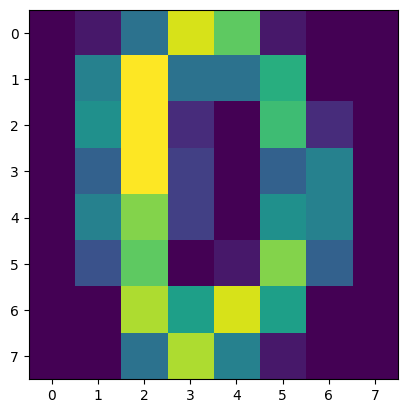

In [7]:
# Plotando a primeira imagem
firstimage = dataset.iloc[0, :64].astype(float).to_numpy().reshape(8, 8)
plt.imshow(firstimage)


# Análise Exploratória

In [8]:
# Informações básicas sobre o dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5620 entries, 0 to 5619
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   input1   5620 non-null   float64
 1   input2   5620 non-null   float64
 2   input3   5620 non-null   float64
 3   input4   5620 non-null   float64
 4   input5   5620 non-null   float64
 5   input6   5620 non-null   float64
 6   input7   5620 non-null   float64
 7   input8   5620 non-null   float64
 8   input9   5620 non-null   float64
 9   input10  5620 non-null   float64
 10  input11  5620 non-null   float64
 11  input12  5620 non-null   float64
 12  input13  5620 non-null   float64
 13  input14  5620 non-null   float64
 14  input15  5620 non-null   float64
 15  input16  5620 non-null   float64
 16  input17  5620 non-null   float64
 17  input18  5620 non-null   float64
 18  input19  5620 non-null   float64
 19  input20  5620 non-null   float64
 20  input21  5620 non-null   float64
 21  input22  5620 

Nota-se que não existem dados nulos no dataset.

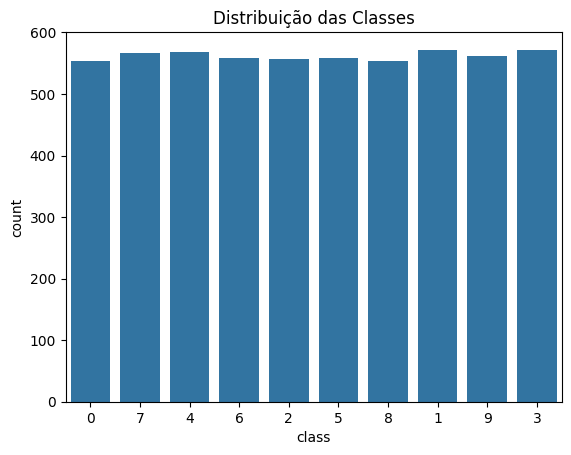

In [9]:
# Visualizar a distribuição das classes
sns.countplot(x='class', data=dataset)
plt.title('Distribuição das Classes')
plt.show()

Nota-se que o dataset é bem balanceado, não se fazendo necessária a utilização de técnicas de balanceamento.

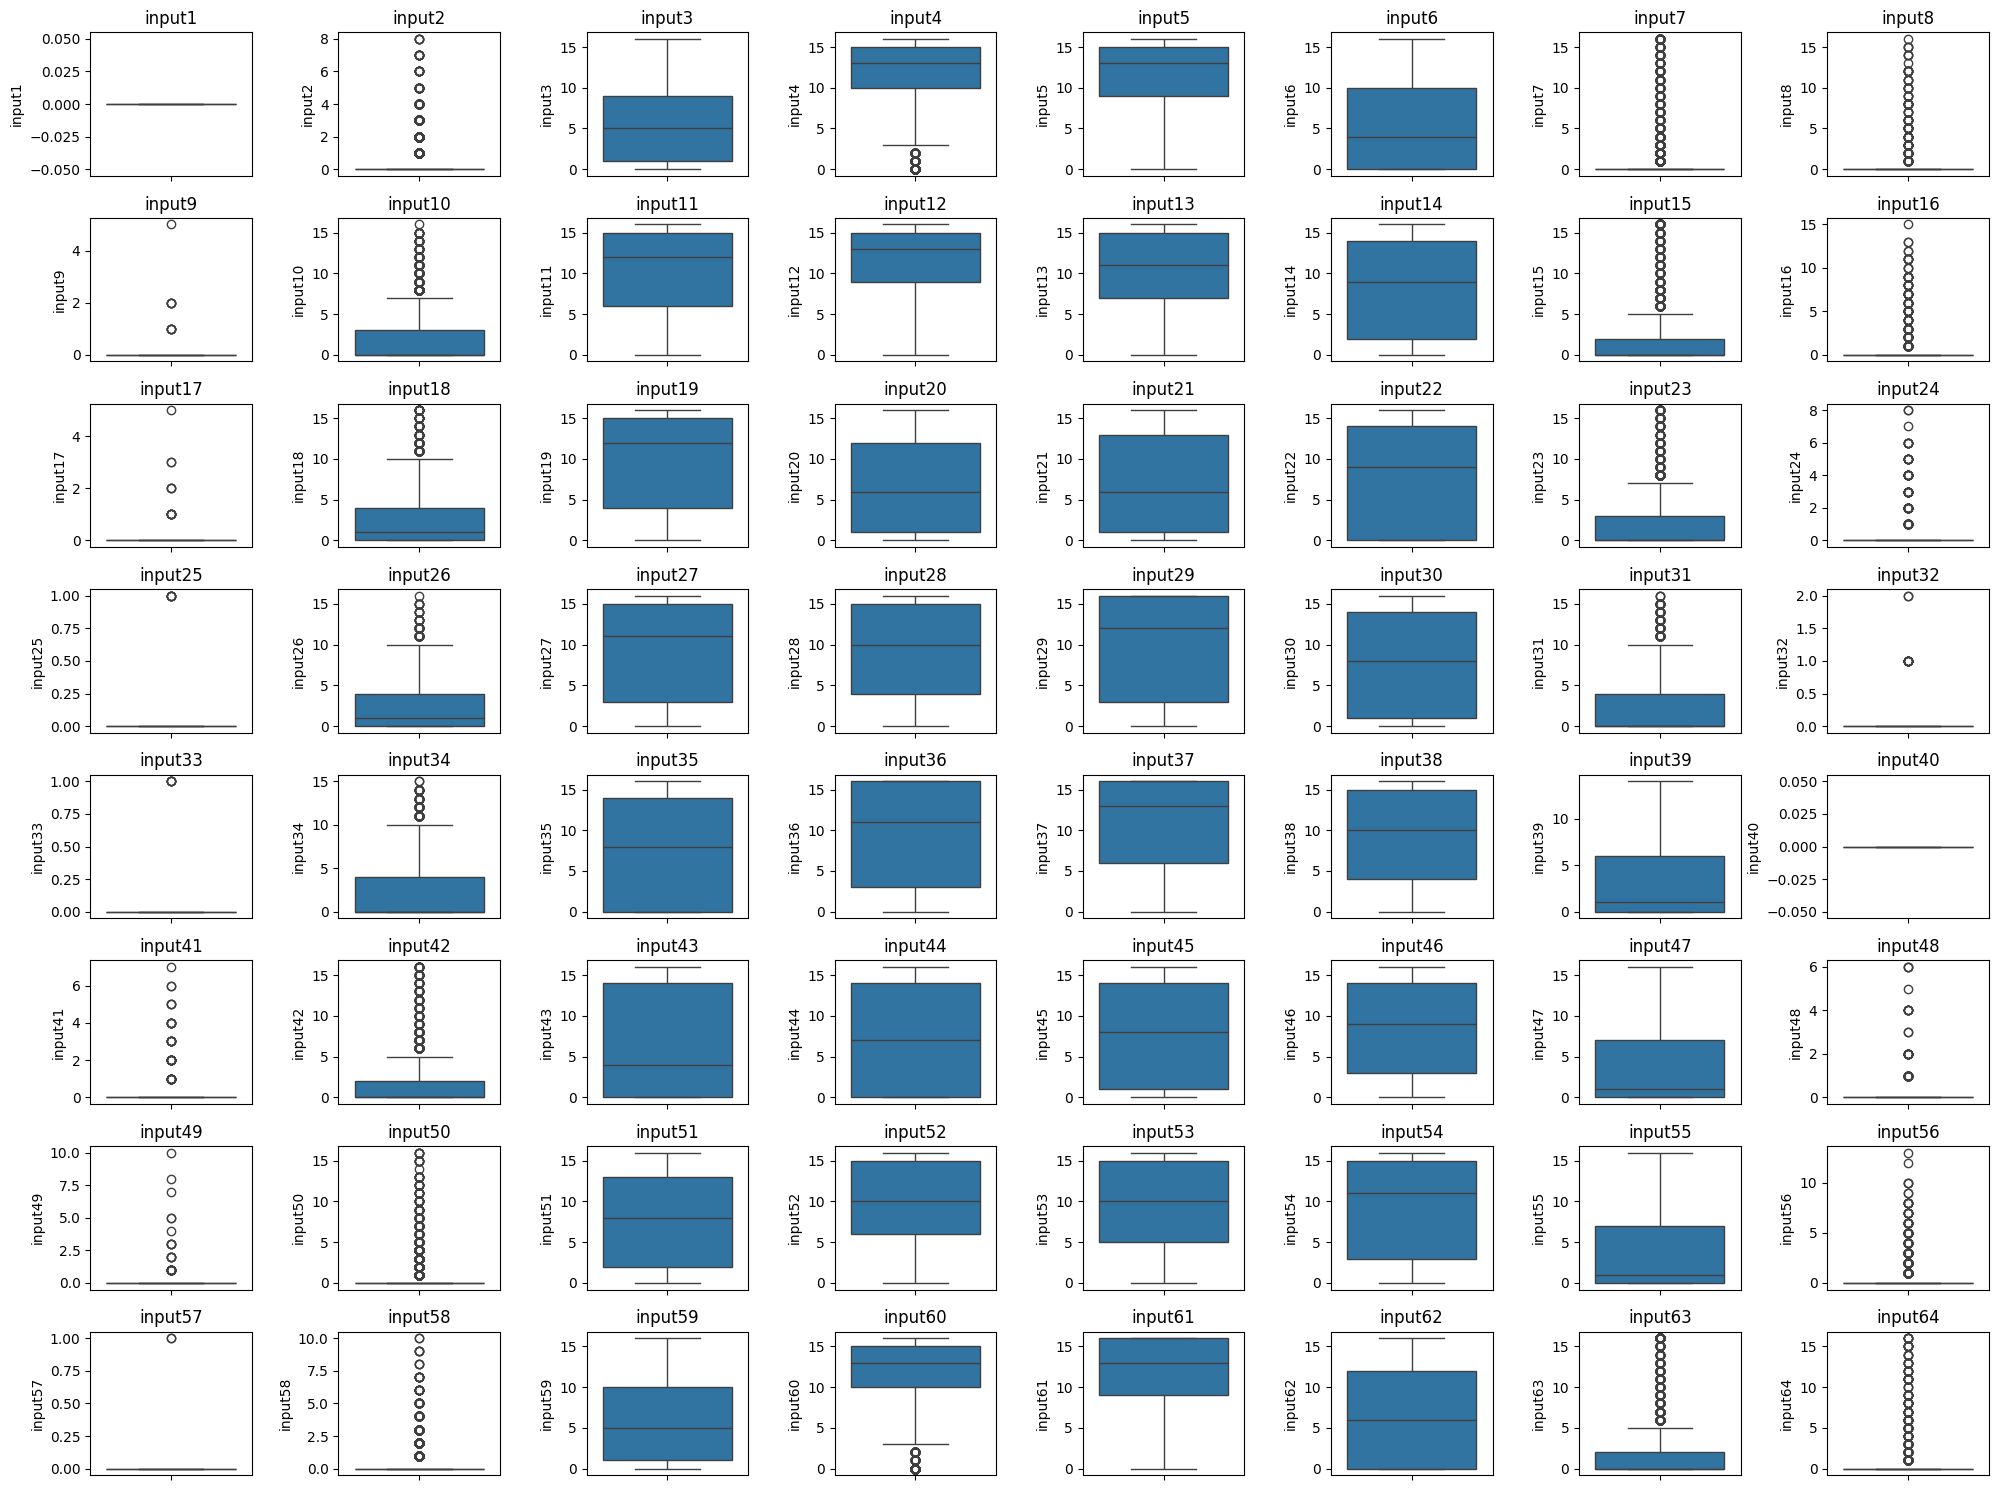

In [10]:
# Grid de Boxplots para visualização de outliers
# Definir o tamanho do grid
n_cols = 8
n_rows = 8

# Grid de subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))

# Boxplots para cada coluna
for i, column in enumerate(dataset.columns[:-1]):  # Excluindo a coluna 'class'
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(y=dataset[column], ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('')

# Ajuste layout
plt.tight_layout()
plt.show()

# Separando o conjunto de dados

In [11]:
# Atributos (features)
X = dataset.drop('class', axis=1)

# Rótulos de classe (target)
y = dataset['class'].apply(lambda x: int(x.decode('utf-8'))) #A coluna class é armazenada como bytes (b'0', b'1', etc.). Vamos converter essa coluna para valores inteiros (0 a 9).

# Separando o conjunto de dados em treino+validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(4496, 64)

In [13]:
X_test.shape

(1124, 64)

# Pré-processamento

## Normalização dos dados

 Como os valores dos atributos variam entre 0 e 16 (devido ao uso de pixels), normalizamos os dados para que todos os atributos tenham a mesma escala, realizando a di.

In [14]:
# Min-Max Scaling
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


## Redução da dimensionalidade (PCA)

O dataset tem 64 atributos, o que pode ser reduzido usando PCA para capturar a maioria da variância em menos dimensões. Espera-se que isso acelere o treinamento e melhore o desempenho dos modelos.

In [15]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)
# Número de componentes principais escolhidos nessa primeira rodada
n_components = pca.n_components_
print(f"Number of components selected: {n_components}")

Number of components selected: 64


Buscando obter 95% da variância dos dados, vamos buscar o número de componentes necessários para que essa redução atenda a isso.

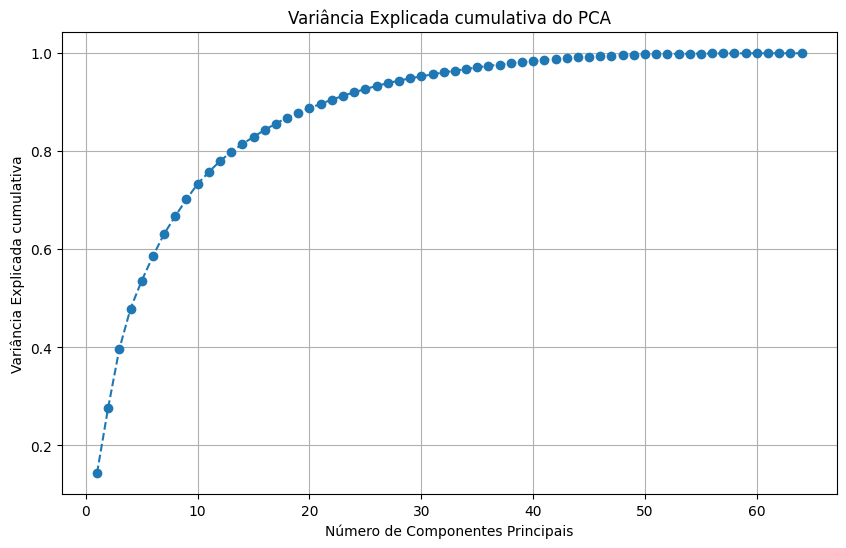

In [16]:
# Variância explicada cumulativa
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plotar a variância explicada cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada cumulativa')
plt.title('Variância Explicada cumulativa do PCA')
plt.grid(True)
plt.show()

In [17]:
# Buscando o número de componentes que explica pelo menos 95% da variância
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Número de componentes que explica pelo menos 95% da variância: {n_components}")

Número de componentes que explica pelo menos 95% da variância: 30


In [18]:
# Ajustando o número de componentes para 30
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

## Verificação de Variância Baixa

 Atributos com baixa variância podem não ser úteis para a previsão e podem ser removidos.

In [19]:
# Variância explicada acumulada pelas componentes principais
explained_variance = pca.explained_variance_ratio_.cumsum()

explained_variance

array([0.14337204, 0.27729815, 0.39708514, 0.4792765 , 0.53624697,
       0.58608822, 0.63147234, 0.66772474, 0.70219808, 0.73358149,
       0.75768257, 0.78016076, 0.79837827, 0.81487202, 0.829418  ,
       0.84368492, 0.85656221, 0.86875631, 0.87856026, 0.88793313,
       0.8967588 , 0.9052785 , 0.91306696, 0.92034187, 0.92706886,
       0.93322218, 0.93897911, 0.94409713, 0.94877279, 0.9529078 ])

Não foi identificado nenhum atributo com variância zero ou muito baixa, portanto não prosseguiremos com a remoção.

## Seleção de atributos (RFE)

A técnica Recursive Feature Elimination (RFE) pode ajudar a identificar os atributos mais importantes para a tarefa de classificação, essa seleção de atributos depende da quantidade de variáveis a serem selecionadas. Portanto, após a aplicação do PCA, temos agora 30 componentes e iremos varias entre todas essas possibilidades, a fim de encontrar a melhor acurácia.

Número de features: 1
Colunas selecionadas:
[2]
----------------------------------------
Número de features: 2
Colunas selecionadas:
[0, 2]
----------------------------------------
Número de features: 3
Colunas selecionadas:
[0, 1, 2]
----------------------------------------
Número de features: 4
Colunas selecionadas:
[0, 1, 2, 3]
----------------------------------------
Número de features: 5
Colunas selecionadas:
[0, 1, 2, 3, 4]
----------------------------------------
Número de features: 6
Colunas selecionadas:
[0, 1, 2, 3, 4, 6]
----------------------------------------
Número de features: 7
Colunas selecionadas:
[0, 1, 2, 3, 4, 6, 7]
----------------------------------------
Número de features: 8
Colunas selecionadas:
[0, 1, 2, 3, 4, 6, 7, 8]
----------------------------------------
Número de features: 9
Colunas selecionadas:
[0, 1, 2, 3, 4, 5, 6, 7, 8]
----------------------------------------
Número de features: 10
Colunas selecionadas:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 11]
--------------

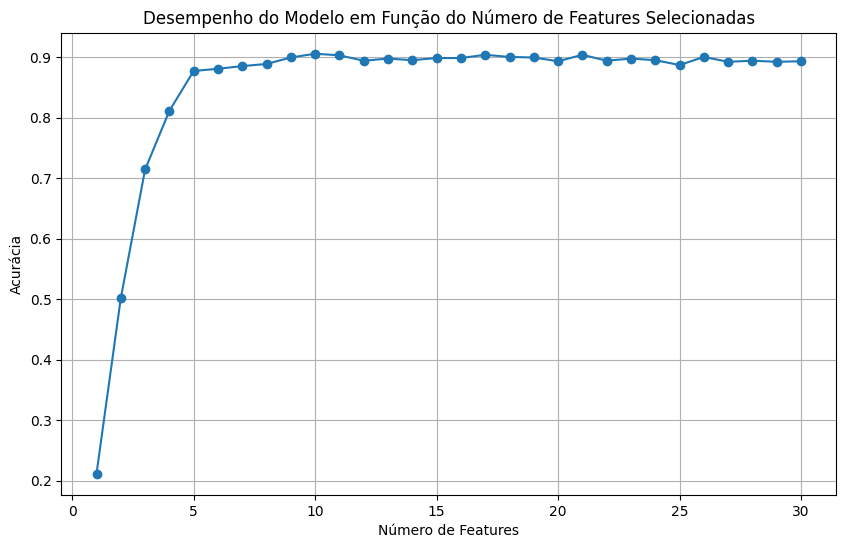

In [20]:
# Armazenar o desempenho e as colunas selecionadas para cada número de variáveis
num_features = []
accuracies = []
selected_features_list = []

# Iterar sobre diferentes números de variáveis
for num in range(1, X_train_pca.shape[1] + 1):
    # Criar o seletor RFE com o número desejado de features
    selector = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=num)
    X_train_rfe = selector.fit_transform(X_train_pca, y_train)
    X_test_rfe = selector.transform(X_test_pca)

    # Obter as colunas selecionadas
    if hasattr(X_train_pca, 'columns'):
        selected_features = X_train_pca.columns[selector.support_]
    else:
        selected_features = np.arange(X_train_pca.shape[1])[selector.support_]

    selected_features_list.append(selected_features.tolist())

    # Treinar o modelo com as features selecionadas
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_rfe, y_train)

    # Fazer previsões e avaliar o desempenho
    y_pred = model.predict(X_test_rfe)
    accuracy = accuracy_score(y_test, y_pred)

    # Armazenar o número de features, a acurácia e as colunas selecionadas
    num_features.append(num)
    accuracies.append(accuracy)

    # Exibir as colunas selecionadas para a iteração atual
    print(f"Número de features: {num}")
    print("Colunas selecionadas:")
    print(selected_features.tolist())
    print('-' * 40)

# Plotar o desempenho em relação ao número de features
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, marker='o')
plt.xlabel('Número de Features')
plt.ylabel('Acurácia')
plt.title('Desempenho do Modelo em Função do Número de Features Selecionadas')
plt.grid(True)
plt.show()



Após cerca de 10 a 12 variáveis, a acurácia se estabiliza, o que significa que adicionar mais variáveis além desse ponto não melhora significativamente a acurácia.

Portanto, 10 seria número ideal de variáveis, visto que o aumento no número de features não trará melhorias consideráveis na acurácia.

Porém, para observar este comportamento da acurácia iremos realizar o treinamento e teste com 5, 10, 12, 15, 20, 25 variáveis, a fim de observar o impacto disso no desempenho dos modelos em detrimento do custo operacional.

# Treinamento e avaliação dos modelos

## Melhores hiperparâmetros encontrados com o RandomizedSearch no projeto 1

In [21]:
# Definindo os modelos com os melhores parâmetros
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=24, random_state=42),
    "MLP": MLPClassifier(solver='adam', hidden_layer_sizes=(100,), activation='relu', random_state=42),
    "Naive Bayes": GaussianNB(var_smoothing=0.1),
    "SVM": SVC(C=5.347746602583891, gamma='scale', kernel='rbf', probability=True, random_state=42)
}

## Treinamento e avaliação utilizando 5, 10, 12, 15, 20, 25 variáveis no RFE


Resultados para RFE com 5 Variáveis:


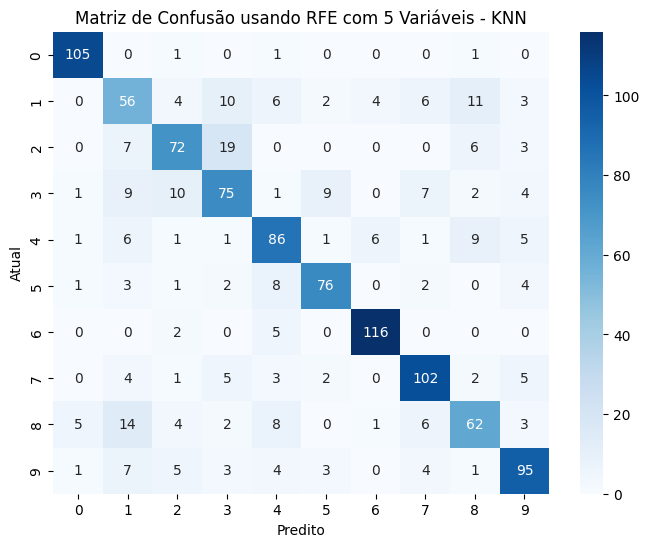

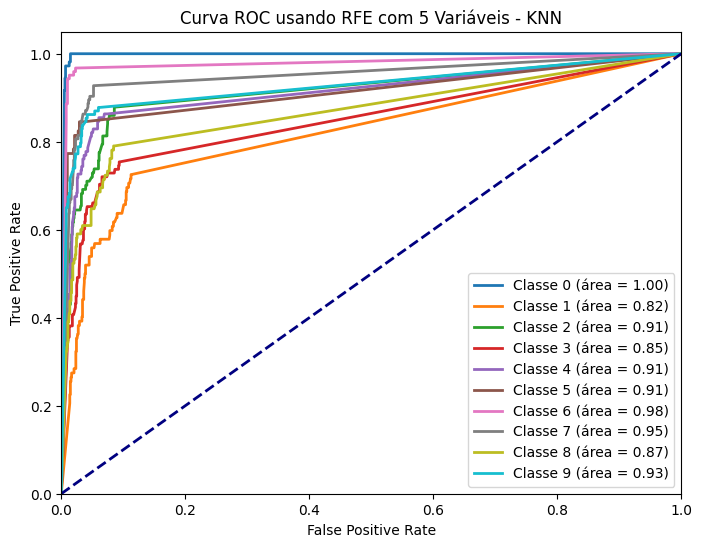

Relatório de Classificação - KNN (RFE com 5 Variáveis):

Acurácia: 0.7518

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       108
           1       0.53      0.55      0.54       102
           2       0.71      0.67      0.69       107
           3       0.64      0.64      0.64       118
           4       0.70      0.74      0.72       117
           5       0.82      0.78      0.80        97
           6       0.91      0.94      0.93       123
           7       0.80      0.82      0.81       124
           8       0.66      0.59      0.62       105
           9       0.78      0.77      0.78       123

    accuracy                           0.75      1124
   macro avg       0.75      0.75      0.75      1124
weighted avg       0.75      0.75      0.75      1124





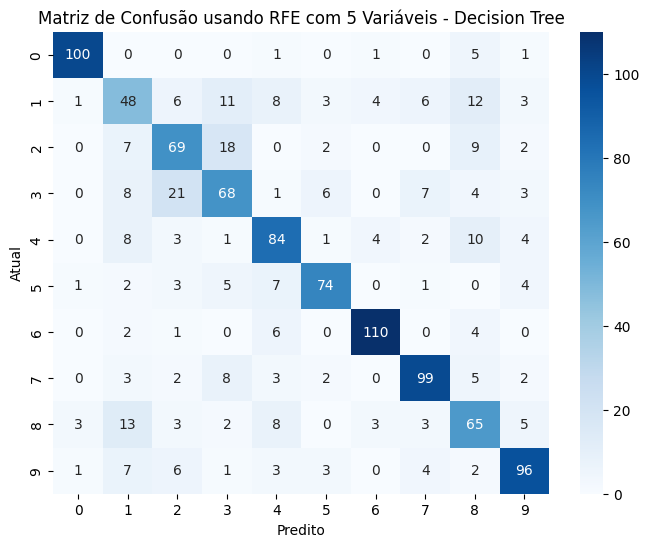

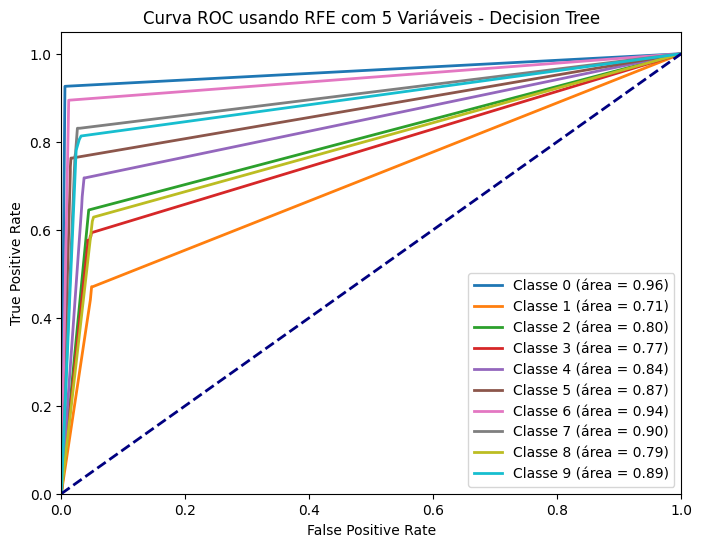

Relatório de Classificação - Decision Tree (RFE com 5 Variáveis):

Acurácia: 0.7233

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       108
           1       0.49      0.47      0.48       102
           2       0.61      0.64      0.62       107
           3       0.60      0.58      0.59       118
           4       0.69      0.72      0.71       117
           5       0.81      0.76      0.79        97
           6       0.90      0.89      0.90       123
           7       0.81      0.80      0.80       124
           8       0.56      0.62      0.59       105
           9       0.80      0.78      0.79       123

    accuracy                           0.72      1124
   macro avg       0.72      0.72      0.72      1124
weighted avg       0.73      0.72      0.72      1124





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


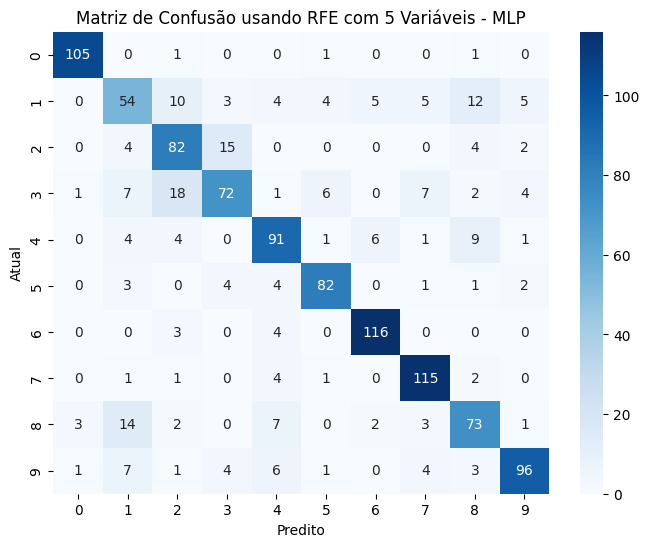

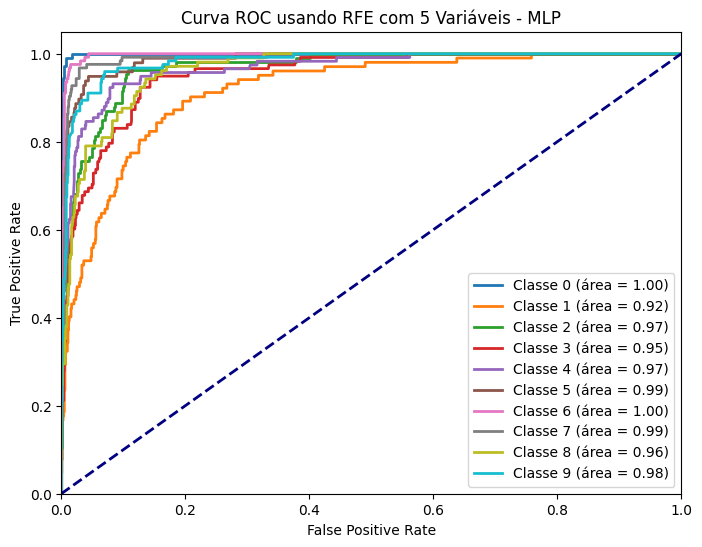

Relatório de Classificação - MLP (RFE com 5 Variáveis):

Acurácia: 0.7883

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.57      0.53      0.55       102
           2       0.67      0.77      0.72       107
           3       0.73      0.61      0.67       118
           4       0.75      0.78      0.76       117
           5       0.85      0.85      0.85        97
           6       0.90      0.94      0.92       123
           7       0.85      0.93      0.88       124
           8       0.68      0.70      0.69       105
           9       0.86      0.78      0.82       123

    accuracy                           0.79      1124
   macro avg       0.78      0.78      0.78      1124
weighted avg       0.79      0.79      0.79      1124





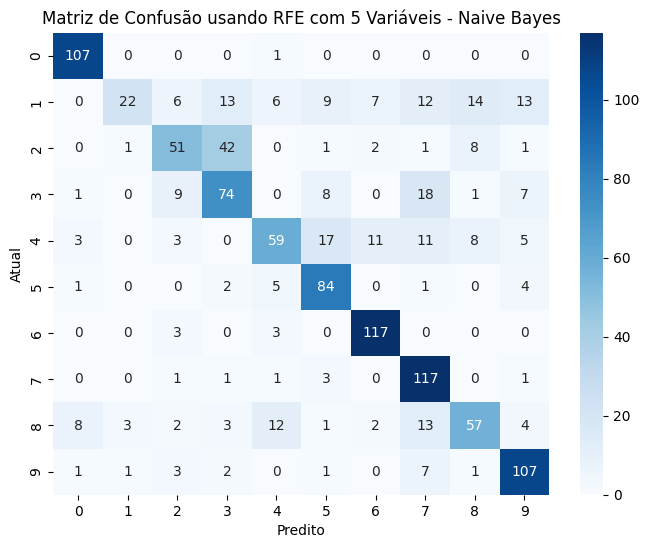

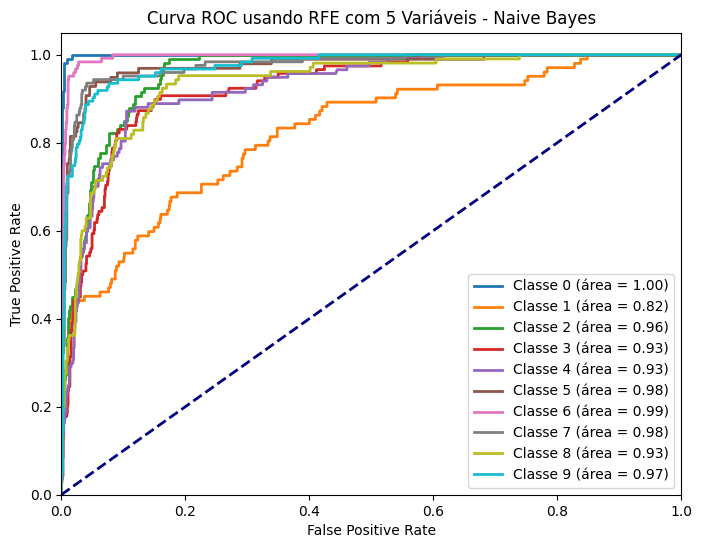

Relatório de Classificação - Naive Bayes (RFE com 5 Variáveis):

Acurácia: 0.7073

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       108
           1       0.81      0.22      0.34       102
           2       0.65      0.48      0.55       107
           3       0.54      0.63      0.58       118
           4       0.68      0.50      0.58       117
           5       0.68      0.87      0.76        97
           6       0.84      0.95      0.89       123
           7       0.65      0.94      0.77       124
           8       0.64      0.54      0.59       105
           9       0.75      0.87      0.81       123

    accuracy                           0.71      1124
   macro avg       0.71      0.70      0.68      1124
weighted avg       0.71      0.71      0.69      1124





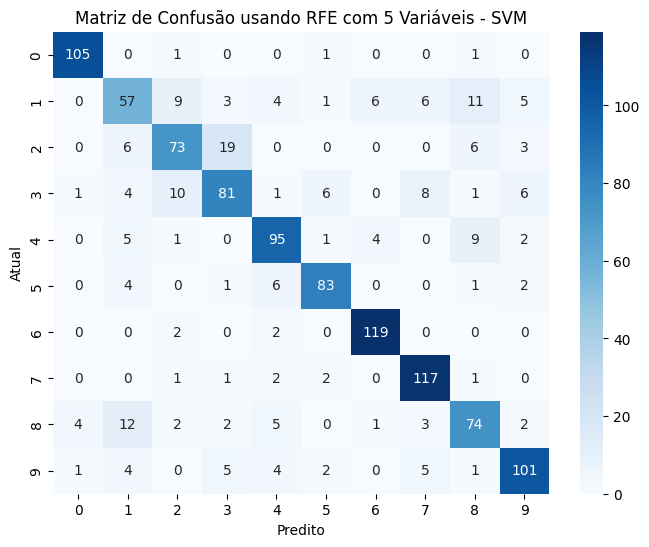

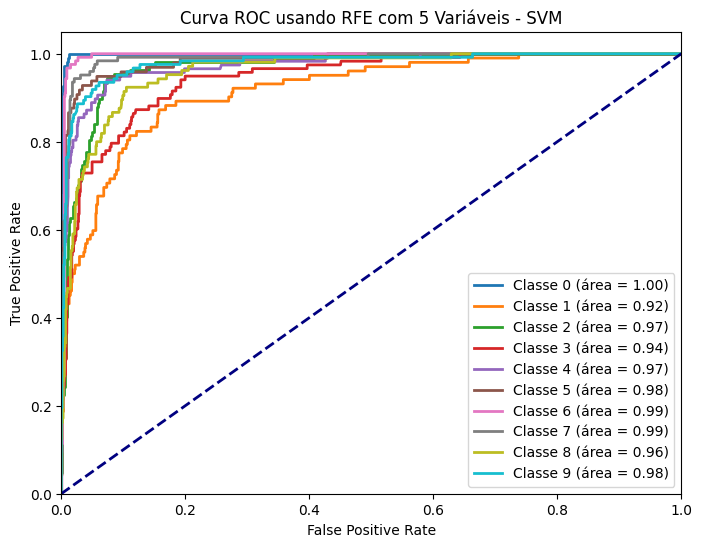

Relatório de Classificação - SVM (RFE com 5 Variáveis):

Acurácia: 0.8052

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.62      0.56      0.59       102
           2       0.74      0.68      0.71       107
           3       0.72      0.69      0.70       118
           4       0.80      0.81      0.81       117
           5       0.86      0.86      0.86        97
           6       0.92      0.97      0.94       123
           7       0.84      0.94      0.89       124
           8       0.70      0.70      0.70       105
           9       0.83      0.82      0.83       123

    accuracy                           0.81      1124
   macro avg       0.80      0.80      0.80      1124
weighted avg       0.80      0.81      0.80      1124




Resultados para RFE com 10 Variáveis:


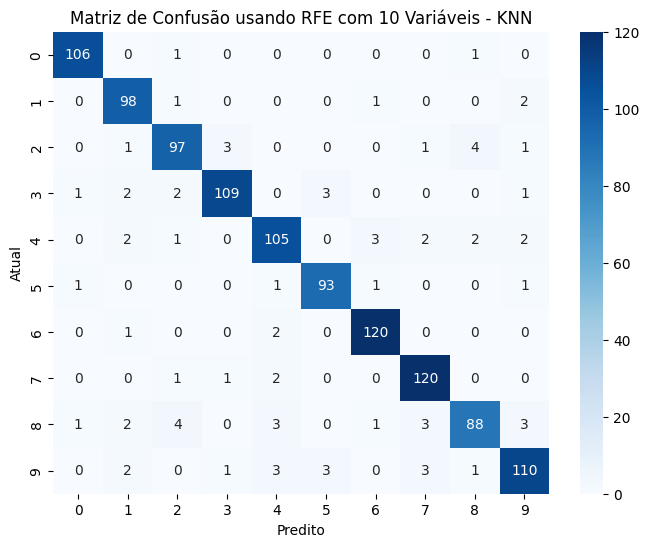

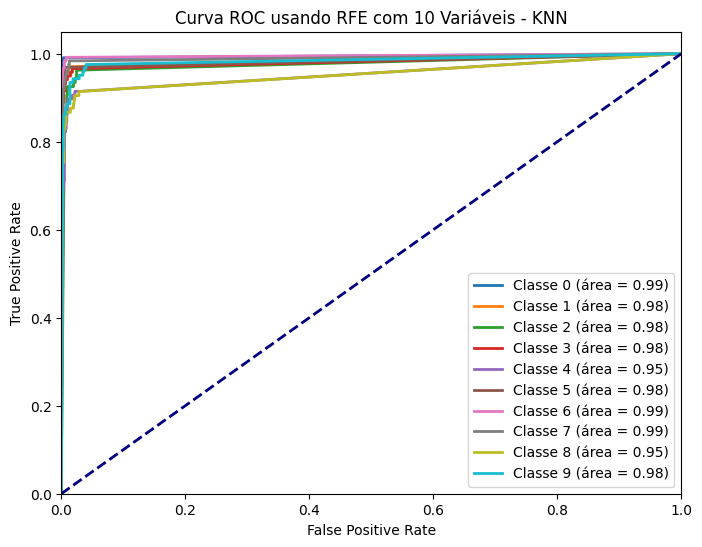

Relatório de Classificação - KNN (RFE com 10 Variáveis):

Acurácia: 0.9306

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.91      0.96      0.93       102
           2       0.91      0.91      0.91       107
           3       0.96      0.92      0.94       118
           4       0.91      0.90      0.90       117
           5       0.94      0.96      0.95        97
           6       0.95      0.98      0.96       123
           7       0.93      0.97      0.95       124
           8       0.92      0.84      0.88       105
           9       0.92      0.89      0.91       123

    accuracy                           0.93      1124
   macro avg       0.93      0.93      0.93      1124
weighted avg       0.93      0.93      0.93      1124





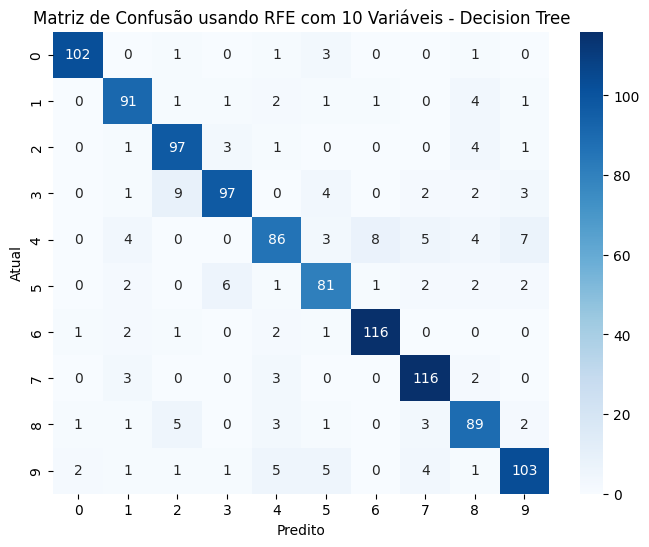

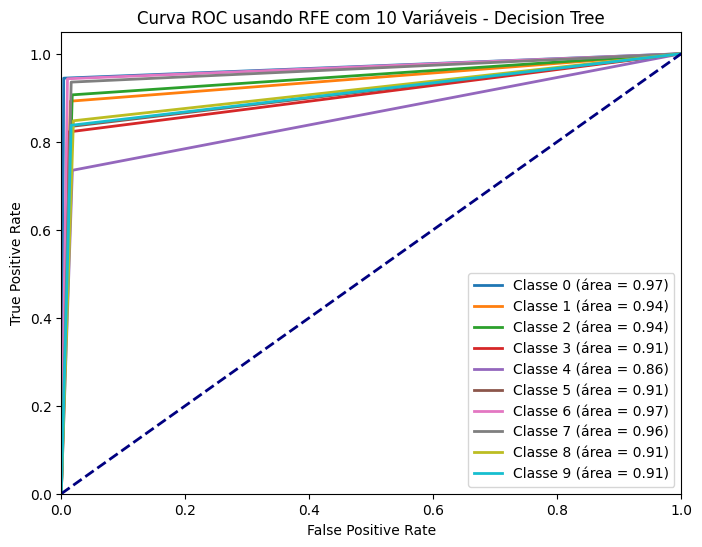

Relatório de Classificação - Decision Tree (RFE com 10 Variáveis):

Acurácia: 0.8701

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.86      0.89      0.88       102
           2       0.84      0.91      0.87       107
           3       0.90      0.82      0.86       118
           4       0.83      0.74      0.78       117
           5       0.82      0.84      0.83        97
           6       0.92      0.94      0.93       123
           7       0.88      0.94      0.91       124
           8       0.82      0.85      0.83       105
           9       0.87      0.84      0.85       123

    accuracy                           0.87      1124
   macro avg       0.87      0.87      0.87      1124
weighted avg       0.87      0.87      0.87      1124





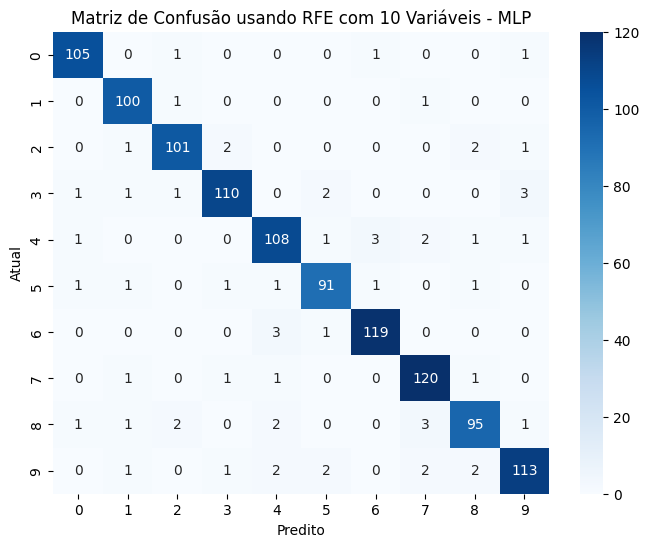

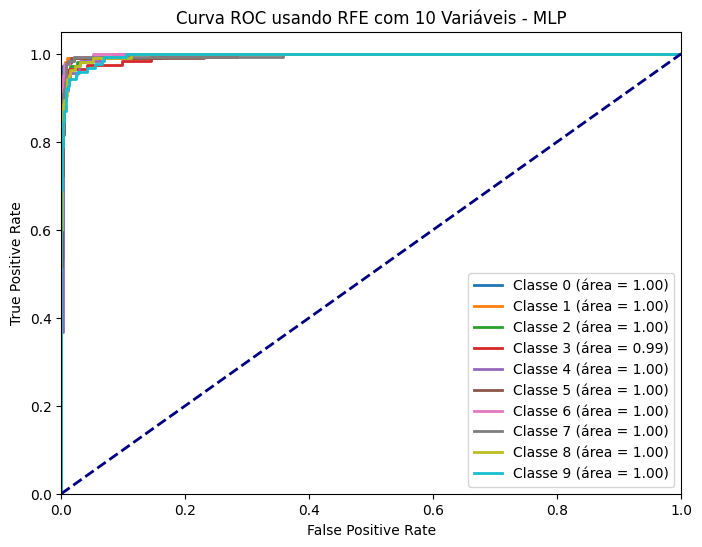

Relatório de Classificação - MLP (RFE com 10 Variáveis):

Acurácia: 0.9448

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.94      0.98      0.96       102
           2       0.95      0.94      0.95       107
           3       0.96      0.93      0.94       118
           4       0.92      0.92      0.92       117
           5       0.94      0.94      0.94        97
           6       0.96      0.97      0.96       123
           7       0.94      0.97      0.95       124
           8       0.93      0.90      0.92       105
           9       0.94      0.92      0.93       123

    accuracy                           0.94      1124
   macro avg       0.94      0.94      0.94      1124
weighted avg       0.94      0.94      0.94      1124





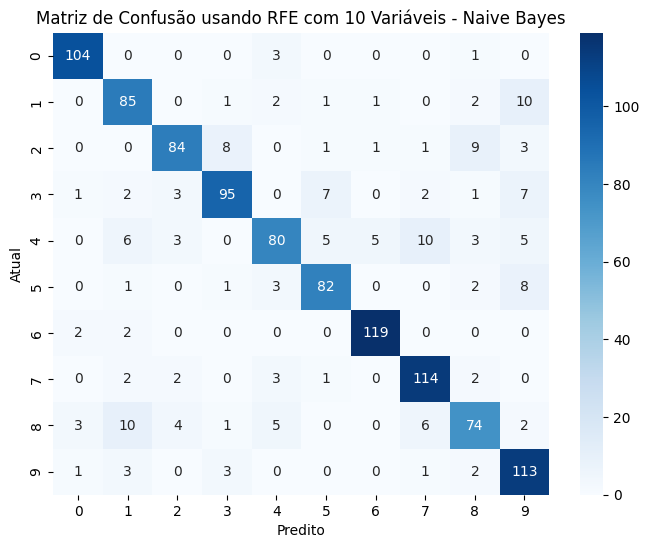

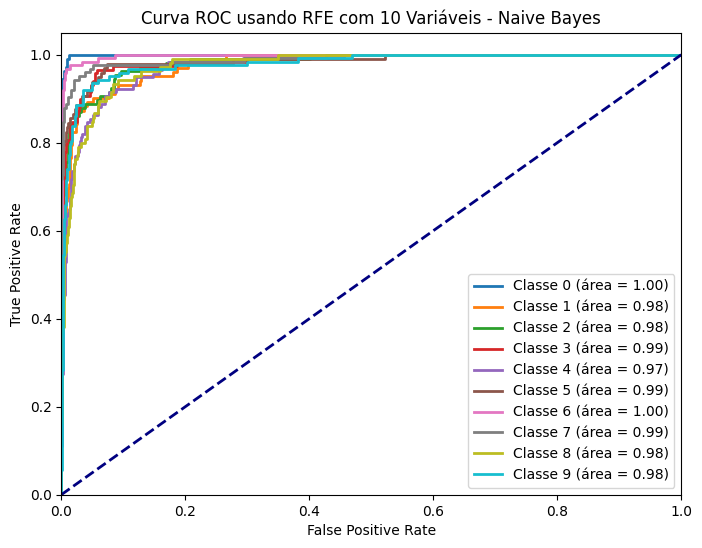

Relatório de Classificação - Naive Bayes (RFE com 10 Variáveis):

Acurácia: 0.8452

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.77      0.83      0.80       102
           2       0.88      0.79      0.83       107
           3       0.87      0.81      0.84       118
           4       0.83      0.68      0.75       117
           5       0.85      0.85      0.85        97
           6       0.94      0.97      0.96       123
           7       0.85      0.92      0.88       124
           8       0.77      0.70      0.74       105
           9       0.76      0.92      0.83       123

    accuracy                           0.85      1124
   macro avg       0.85      0.84      0.84      1124
weighted avg       0.85      0.85      0.84      1124





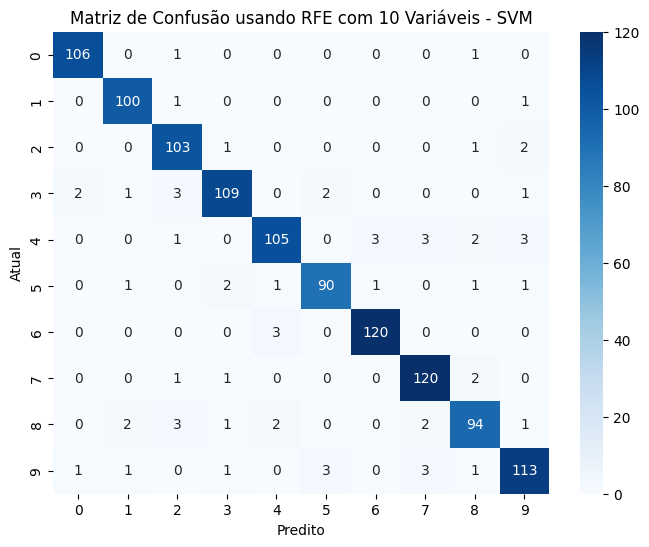

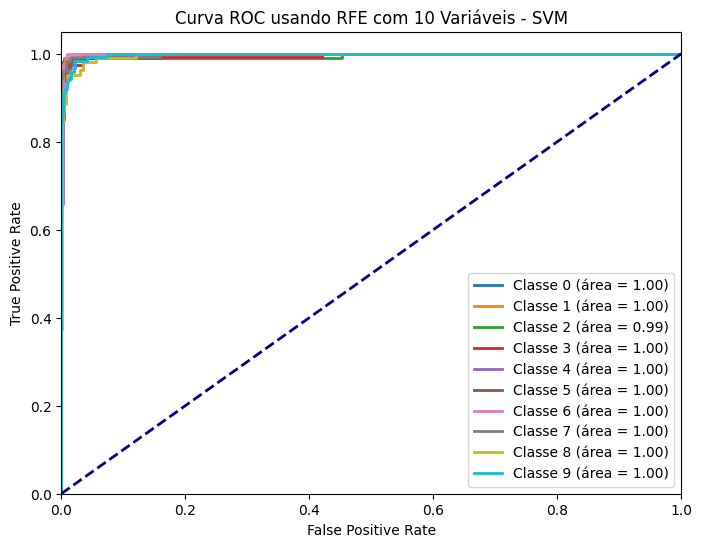

Relatório de Classificação - SVM (RFE com 10 Variáveis):

Acurácia: 0.9431

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.95      0.98      0.97       102
           2       0.91      0.96      0.94       107
           3       0.95      0.92      0.94       118
           4       0.95      0.90      0.92       117
           5       0.95      0.93      0.94        97
           6       0.97      0.98      0.97       123
           7       0.94      0.97      0.95       124
           8       0.92      0.90      0.91       105
           9       0.93      0.92      0.92       123

    accuracy                           0.94      1124
   macro avg       0.94      0.94      0.94      1124
weighted avg       0.94      0.94      0.94      1124




Resultados para RFE com 12 Variáveis:


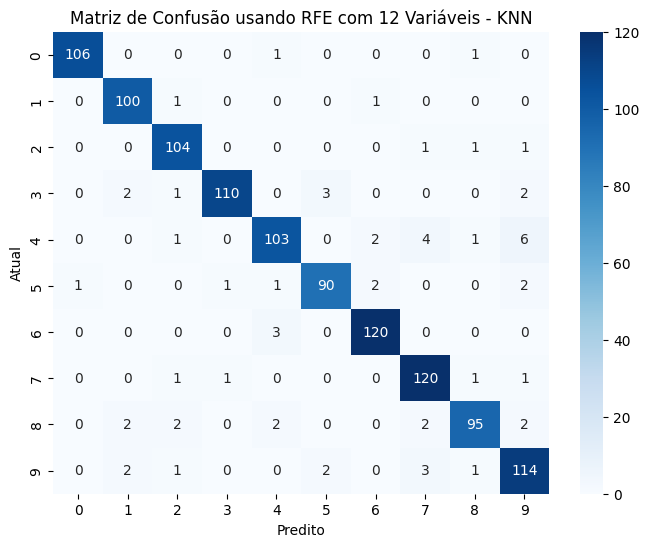

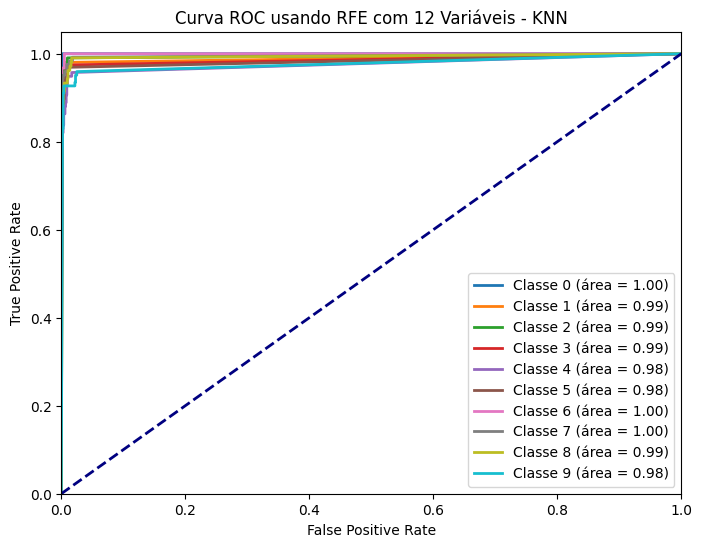

Relatório de Classificação - KNN (RFE com 12 Variáveis):

Acurácia: 0.9448

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.94      0.98      0.96       102
           2       0.94      0.97      0.95       107
           3       0.98      0.93      0.96       118
           4       0.94      0.88      0.91       117
           5       0.95      0.93      0.94        97
           6       0.96      0.98      0.97       123
           7       0.92      0.97      0.94       124
           8       0.95      0.90      0.93       105
           9       0.89      0.93      0.91       123

    accuracy                           0.94      1124
   macro avg       0.95      0.94      0.95      1124
weighted avg       0.95      0.94      0.94      1124





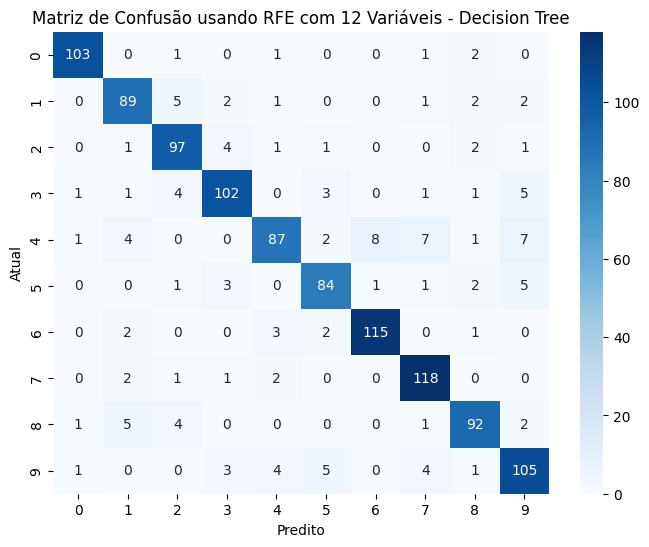

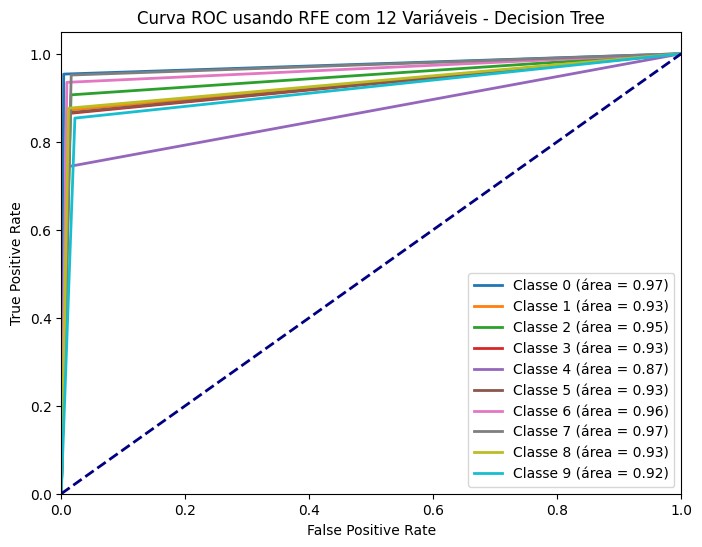

Relatório de Classificação - Decision Tree (RFE com 12 Variáveis):

Acurácia: 0.8826

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.86      0.87      0.86       102
           2       0.86      0.91      0.88       107
           3       0.89      0.86      0.88       118
           4       0.88      0.74      0.81       117
           5       0.87      0.87      0.87        97
           6       0.93      0.93      0.93       123
           7       0.88      0.95      0.91       124
           8       0.88      0.88      0.88       105
           9       0.83      0.85      0.84       123

    accuracy                           0.88      1124
   macro avg       0.88      0.88      0.88      1124
weighted avg       0.88      0.88      0.88      1124





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


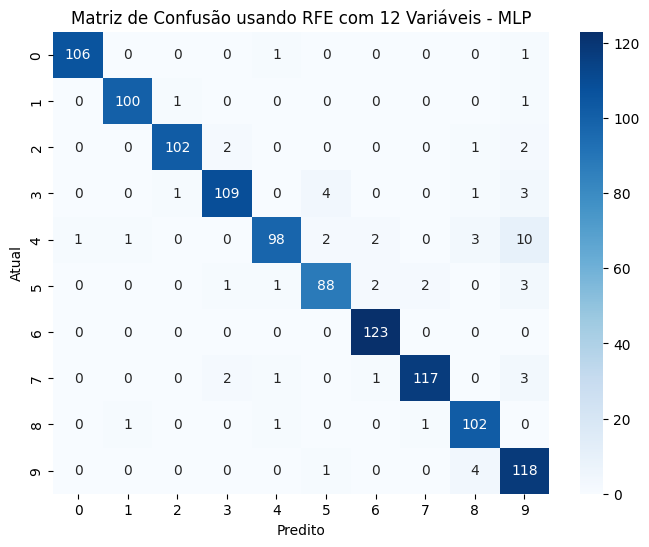

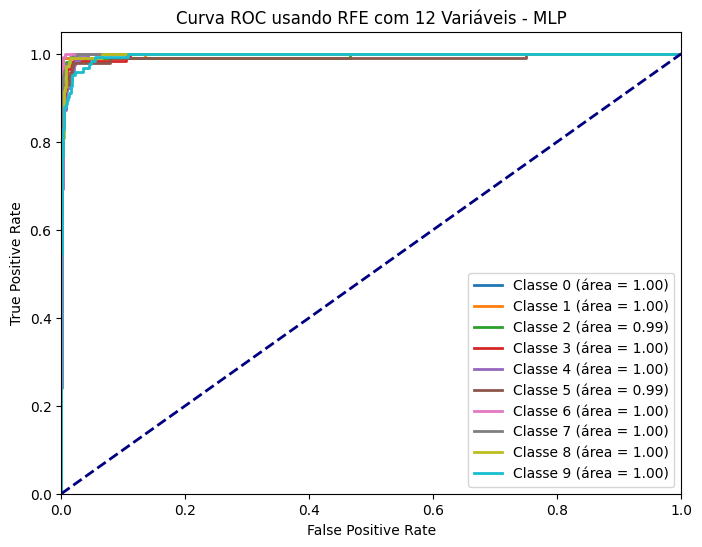

Relatório de Classificação - MLP (RFE com 12 Variáveis):

Acurácia: 0.9457

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.98      0.98      0.98       102
           2       0.98      0.95      0.97       107
           3       0.96      0.92      0.94       118
           4       0.96      0.84      0.89       117
           5       0.93      0.91      0.92        97
           6       0.96      1.00      0.98       123
           7       0.97      0.94      0.96       124
           8       0.92      0.97      0.94       105
           9       0.84      0.96      0.89       123

    accuracy                           0.95      1124
   macro avg       0.95      0.95      0.95      1124
weighted avg       0.95      0.95      0.95      1124





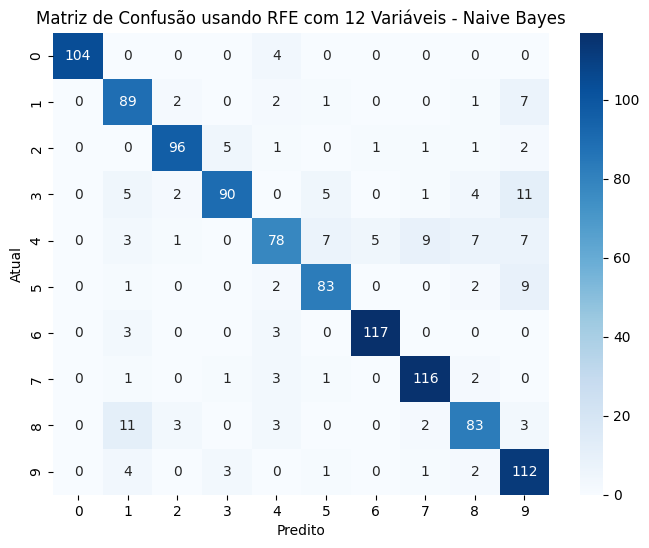

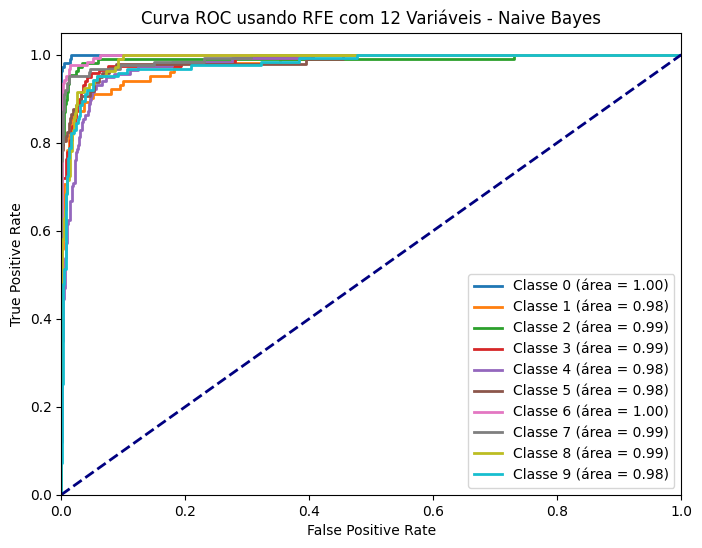

Relatório de Classificação - Naive Bayes (RFE com 12 Variáveis):

Acurácia: 0.8612

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       108
           1       0.76      0.87      0.81       102
           2       0.92      0.90      0.91       107
           3       0.91      0.76      0.83       118
           4       0.81      0.67      0.73       117
           5       0.85      0.86      0.85        97
           6       0.95      0.95      0.95       123
           7       0.89      0.94      0.91       124
           8       0.81      0.79      0.80       105
           9       0.74      0.91      0.82       123

    accuracy                           0.86      1124
   macro avg       0.87      0.86      0.86      1124
weighted avg       0.87      0.86      0.86      1124





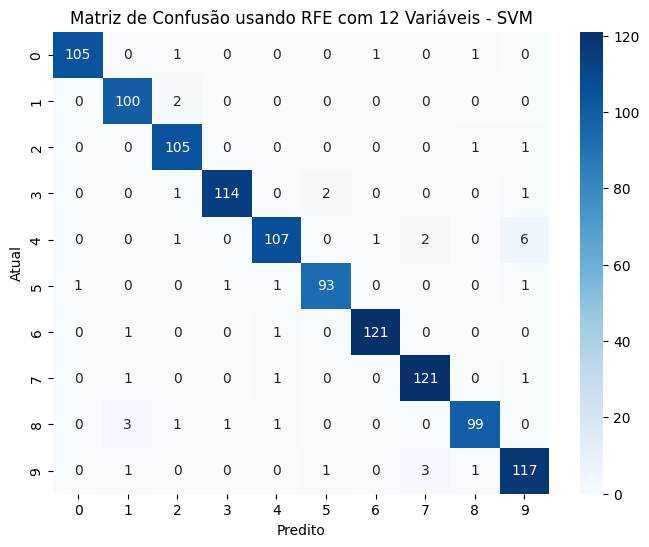

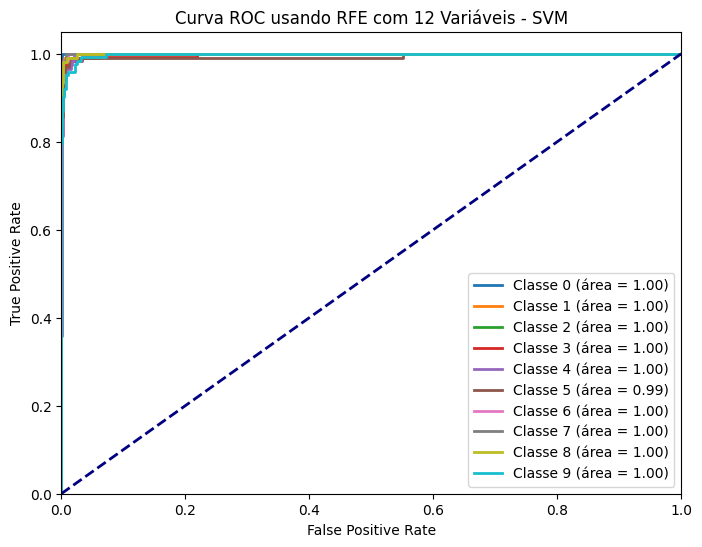

Relatório de Classificação - SVM (RFE com 12 Variáveis):

Acurácia: 0.9626

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.94      0.98      0.96       102
           2       0.95      0.98      0.96       107
           3       0.98      0.97      0.97       118
           4       0.96      0.91      0.94       117
           5       0.97      0.96      0.96        97
           6       0.98      0.98      0.98       123
           7       0.96      0.98      0.97       124
           8       0.97      0.94      0.96       105
           9       0.92      0.95      0.94       123

    accuracy                           0.96      1124
   macro avg       0.96      0.96      0.96      1124
weighted avg       0.96      0.96      0.96      1124




Resultados para RFE com 15 Variáveis:


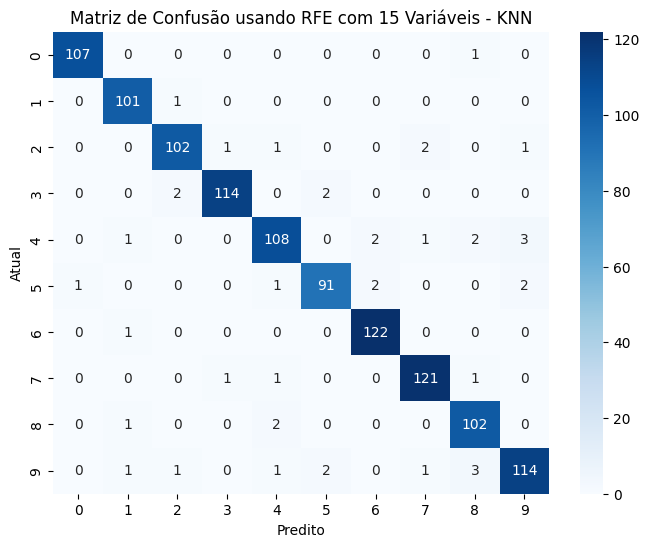

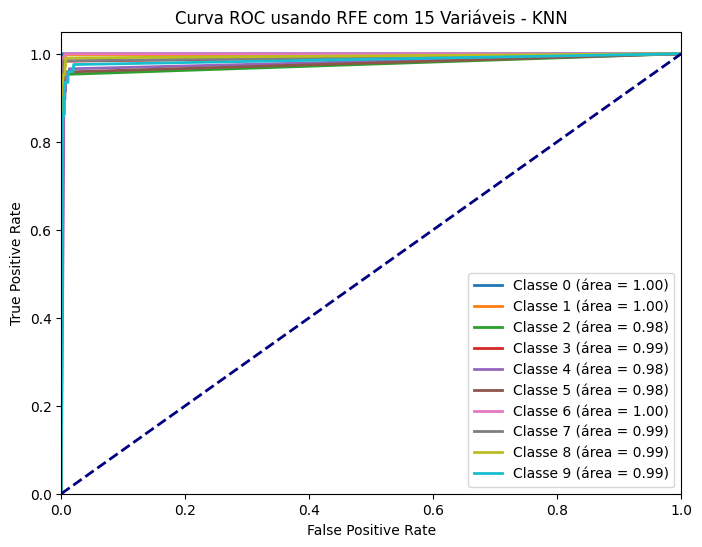

Relatório de Classificação - KNN (RFE com 15 Variáveis):

Acurácia: 0.9626

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.96      0.99      0.98       102
           2       0.96      0.95      0.96       107
           3       0.98      0.97      0.97       118
           4       0.95      0.92      0.94       117
           5       0.96      0.94      0.95        97
           6       0.97      0.99      0.98       123
           7       0.97      0.98      0.97       124
           8       0.94      0.97      0.95       105
           9       0.95      0.93      0.94       123

    accuracy                           0.96      1124
   macro avg       0.96      0.96      0.96      1124
weighted avg       0.96      0.96      0.96      1124





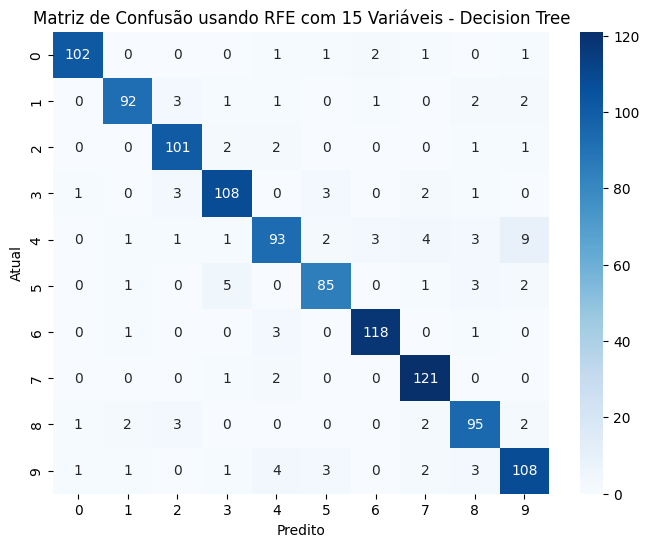

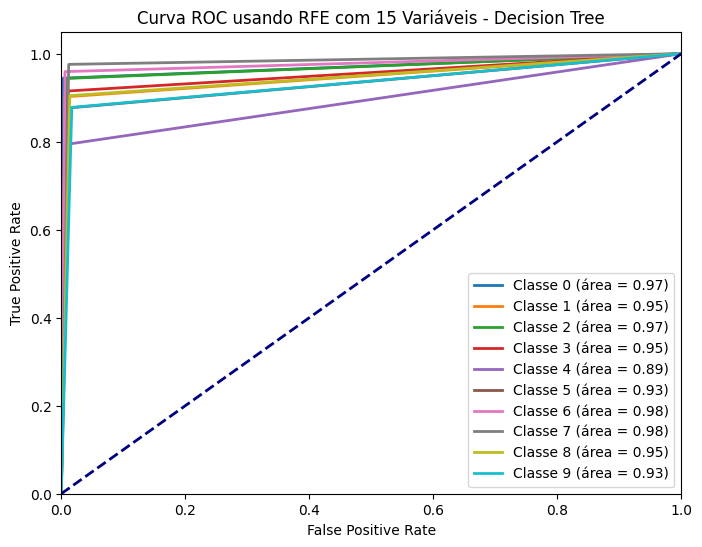

Relatório de Classificação - Decision Tree (RFE com 15 Variáveis):

Acurácia: 0.9101

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.94      0.90      0.92       102
           2       0.91      0.94      0.93       107
           3       0.91      0.92      0.91       118
           4       0.88      0.79      0.83       117
           5       0.90      0.88      0.89        97
           6       0.95      0.96      0.96       123
           7       0.91      0.98      0.94       124
           8       0.87      0.90      0.89       105
           9       0.86      0.88      0.87       123

    accuracy                           0.91      1124
   macro avg       0.91      0.91      0.91      1124
weighted avg       0.91      0.91      0.91      1124





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


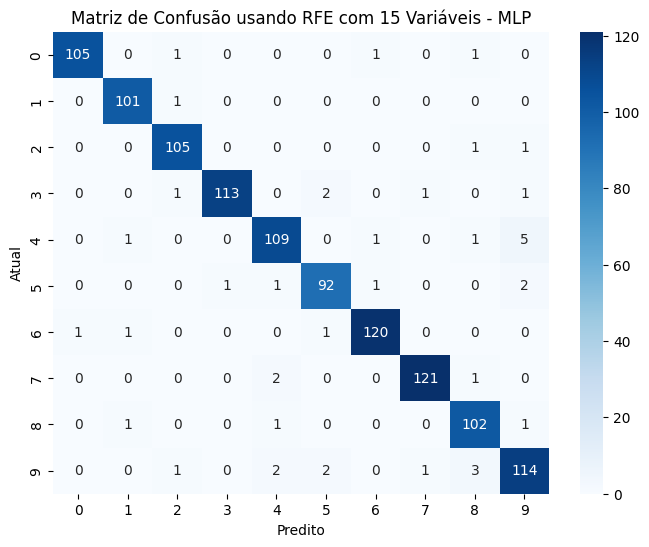

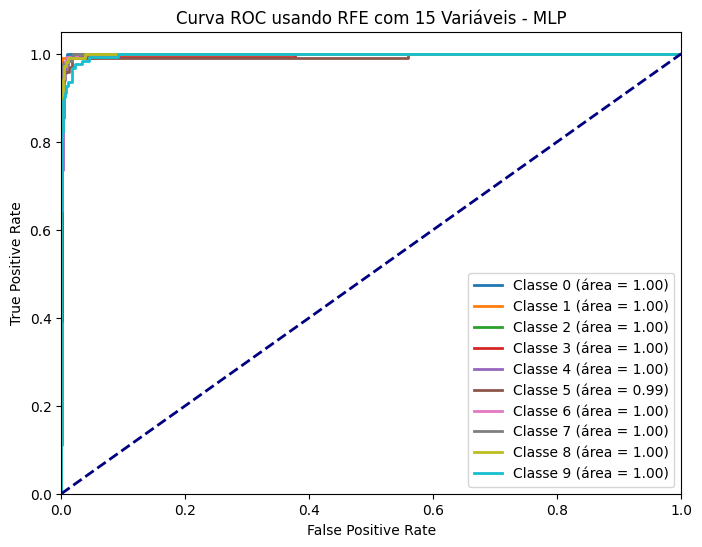

Relatório de Classificação - MLP (RFE com 15 Variáveis):

Acurácia: 0.9626

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.97      0.99      0.98       102
           2       0.96      0.98      0.97       107
           3       0.99      0.96      0.97       118
           4       0.95      0.93      0.94       117
           5       0.95      0.95      0.95        97
           6       0.98      0.98      0.98       123
           7       0.98      0.98      0.98       124
           8       0.94      0.97      0.95       105
           9       0.92      0.93      0.92       123

    accuracy                           0.96      1124
   macro avg       0.96      0.96      0.96      1124
weighted avg       0.96      0.96      0.96      1124





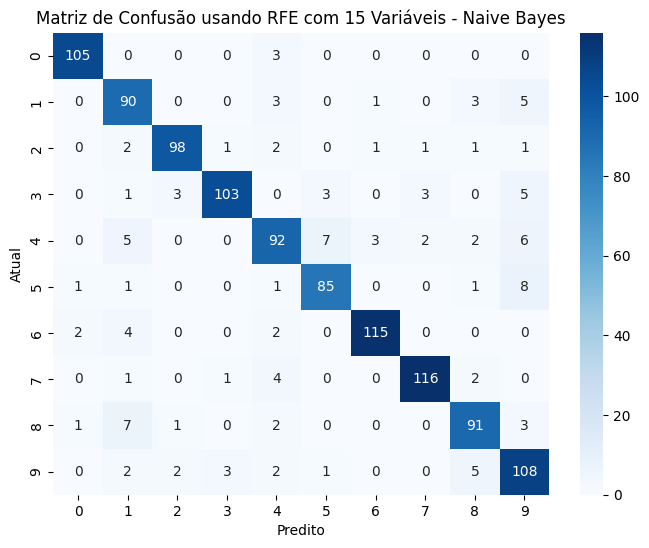

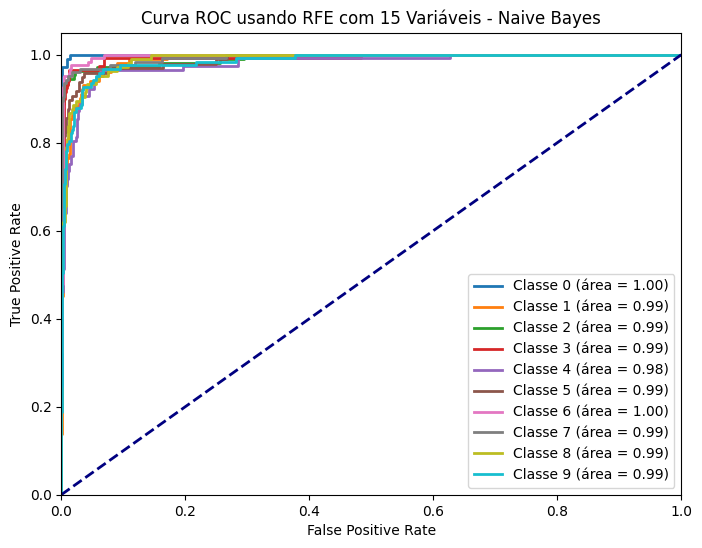

Relatório de Classificação - Naive Bayes (RFE com 15 Variáveis):

Acurácia: 0.8923

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.80      0.88      0.84       102
           2       0.94      0.92      0.93       107
           3       0.95      0.87      0.91       118
           4       0.83      0.79      0.81       117
           5       0.89      0.88      0.88        97
           6       0.96      0.93      0.95       123
           7       0.95      0.94      0.94       124
           8       0.87      0.87      0.87       105
           9       0.79      0.88      0.83       123

    accuracy                           0.89      1124
   macro avg       0.89      0.89      0.89      1124
weighted avg       0.89      0.89      0.89      1124





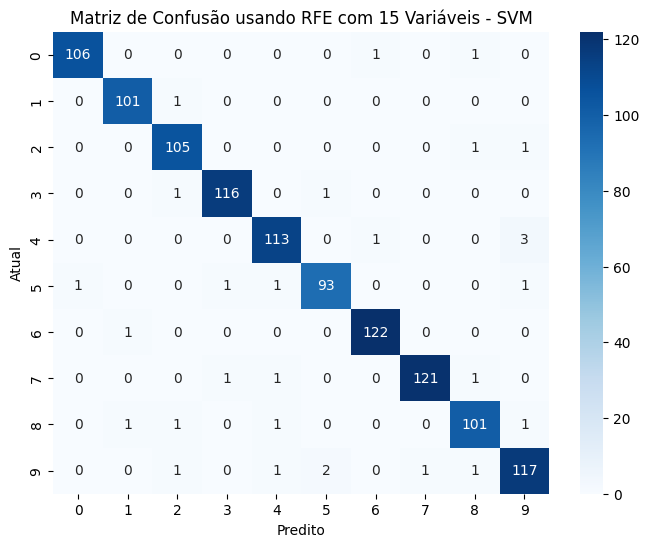

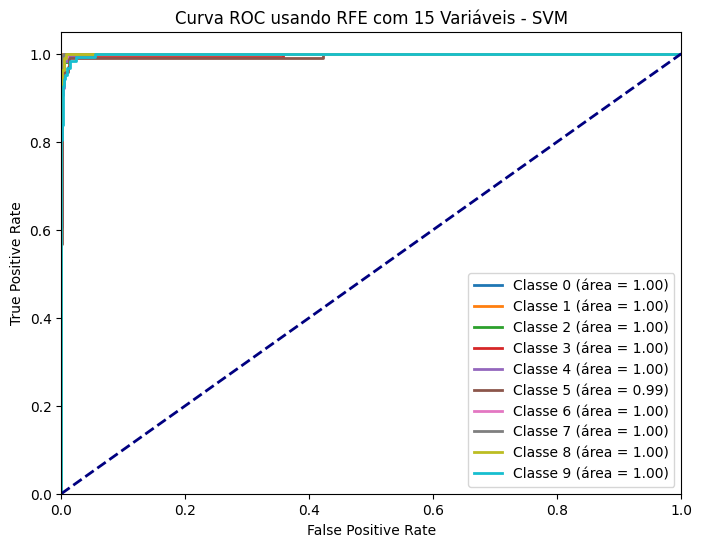

Relatório de Classificação - SVM (RFE com 15 Variáveis):

Acurácia: 0.9742

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.98      0.99      0.99       102
           2       0.96      0.98      0.97       107
           3       0.98      0.98      0.98       118
           4       0.97      0.97      0.97       117
           5       0.97      0.96      0.96        97
           6       0.98      0.99      0.99       123
           7       0.99      0.98      0.98       124
           8       0.96      0.96      0.96       105
           9       0.95      0.95      0.95       123

    accuracy                           0.97      1124
   macro avg       0.97      0.97      0.97      1124
weighted avg       0.97      0.97      0.97      1124




Resultados para RFE com 20 Variáveis:


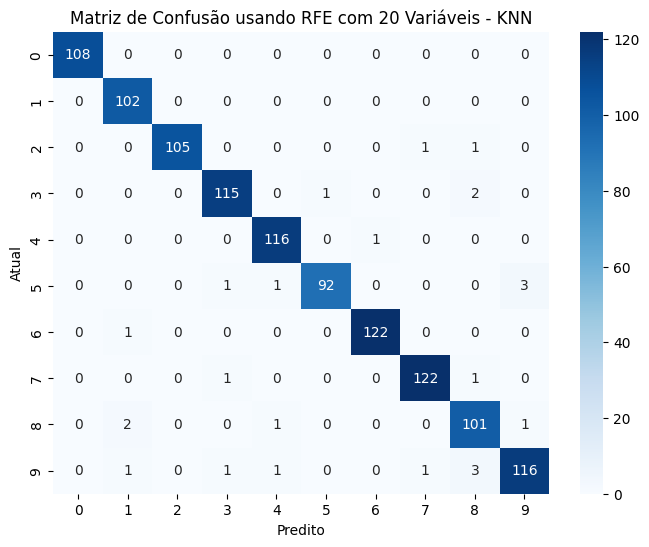

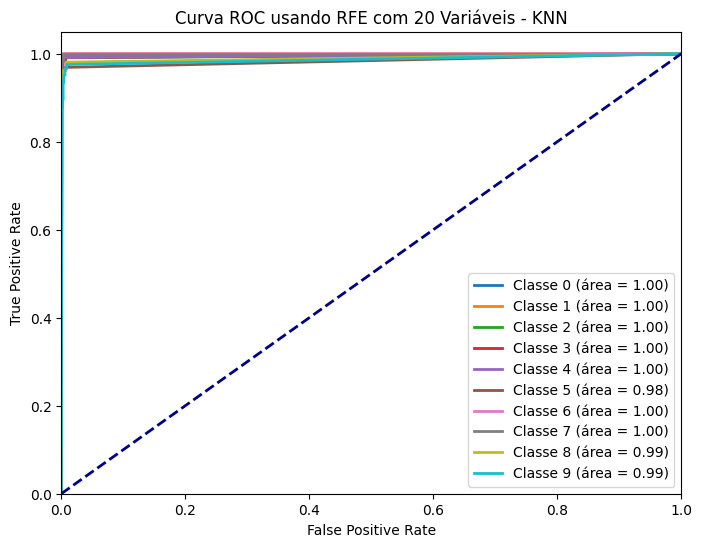

Relatório de Classificação - KNN (RFE com 20 Variáveis):

Acurácia: 0.9778

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.96      1.00      0.98       102
           2       1.00      0.98      0.99       107
           3       0.97      0.97      0.97       118
           4       0.97      0.99      0.98       117
           5       0.99      0.95      0.97        97
           6       0.99      0.99      0.99       123
           7       0.98      0.98      0.98       124
           8       0.94      0.96      0.95       105
           9       0.97      0.94      0.95       123

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124





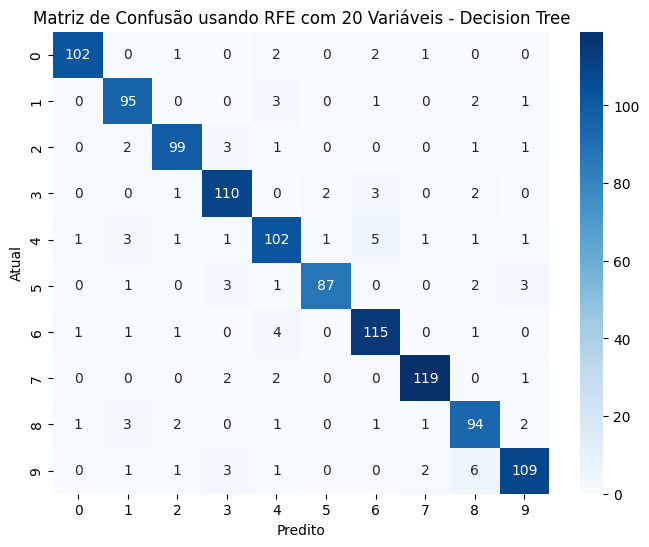

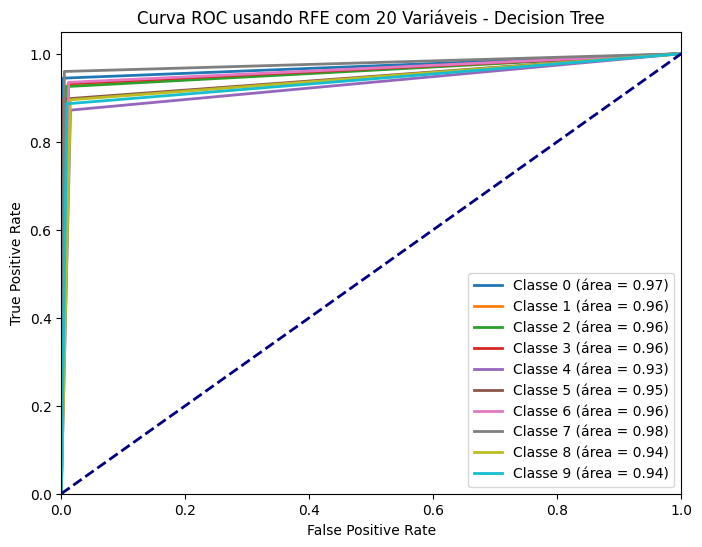

Relatório de Classificação - Decision Tree (RFE com 20 Variáveis):

Acurácia: 0.9181

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.90      0.93      0.91       102
           2       0.93      0.93      0.93       107
           3       0.90      0.93      0.92       118
           4       0.87      0.87      0.87       117
           5       0.97      0.90      0.93        97
           6       0.91      0.93      0.92       123
           7       0.96      0.96      0.96       124
           8       0.86      0.90      0.88       105
           9       0.92      0.89      0.90       123

    accuracy                           0.92      1124
   macro avg       0.92      0.92      0.92      1124
weighted avg       0.92      0.92      0.92      1124





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


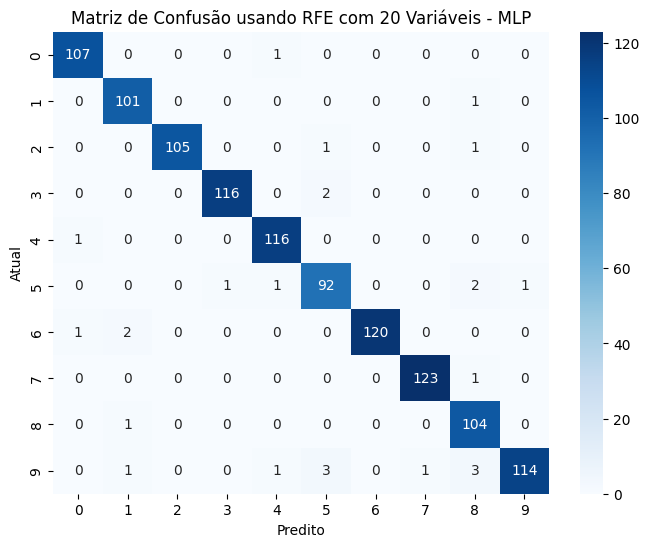

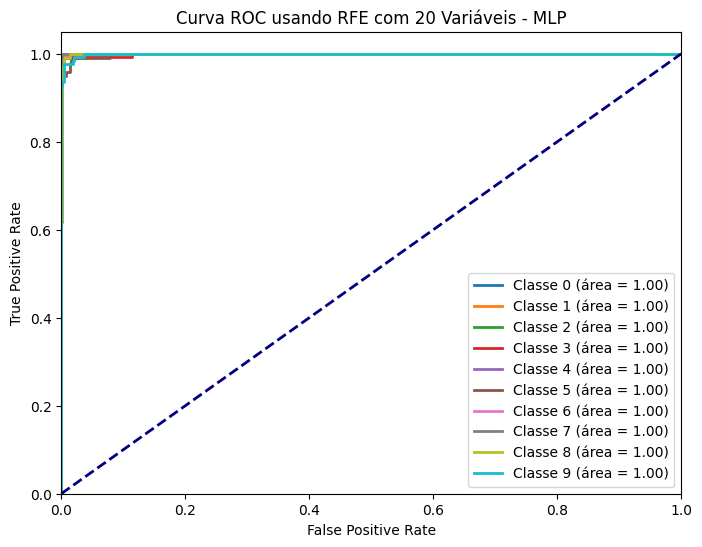

Relatório de Classificação - MLP (RFE com 20 Variáveis):

Acurácia: 0.9769

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.96      0.99      0.98       102
           2       1.00      0.98      0.99       107
           3       0.99      0.98      0.99       118
           4       0.97      0.99      0.98       117
           5       0.94      0.95      0.94        97
           6       1.00      0.98      0.99       123
           7       0.99      0.99      0.99       124
           8       0.93      0.99      0.96       105
           9       0.99      0.93      0.96       123

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124





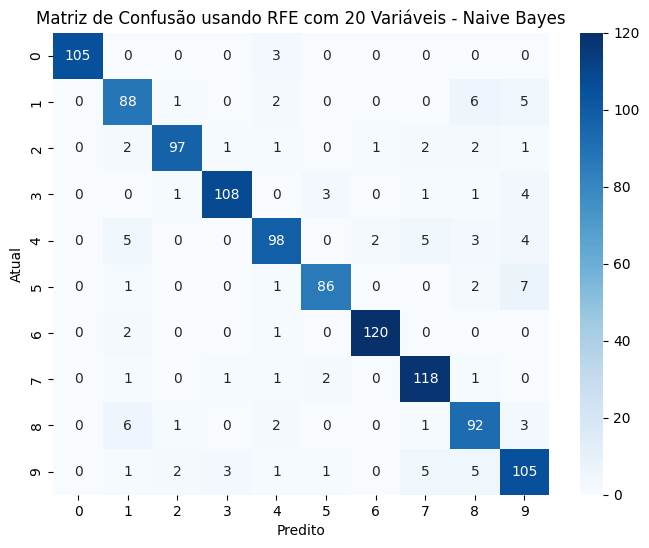

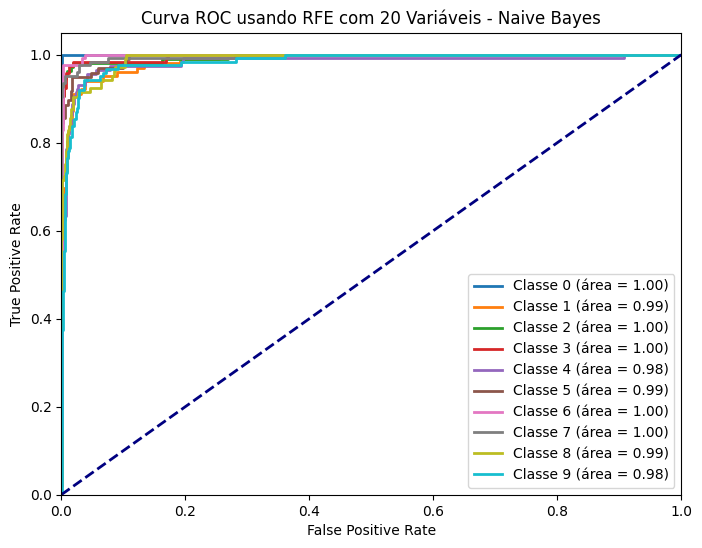

Relatório de Classificação - Naive Bayes (RFE com 20 Variáveis):

Acurácia: 0.9048

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       108
           1       0.83      0.86      0.85       102
           2       0.95      0.91      0.93       107
           3       0.96      0.92      0.94       118
           4       0.89      0.84      0.86       117
           5       0.93      0.89      0.91        97
           6       0.98      0.98      0.98       123
           7       0.89      0.95      0.92       124
           8       0.82      0.88      0.85       105
           9       0.81      0.85      0.83       123

    accuracy                           0.90      1124
   macro avg       0.91      0.90      0.90      1124
weighted avg       0.91      0.90      0.91      1124





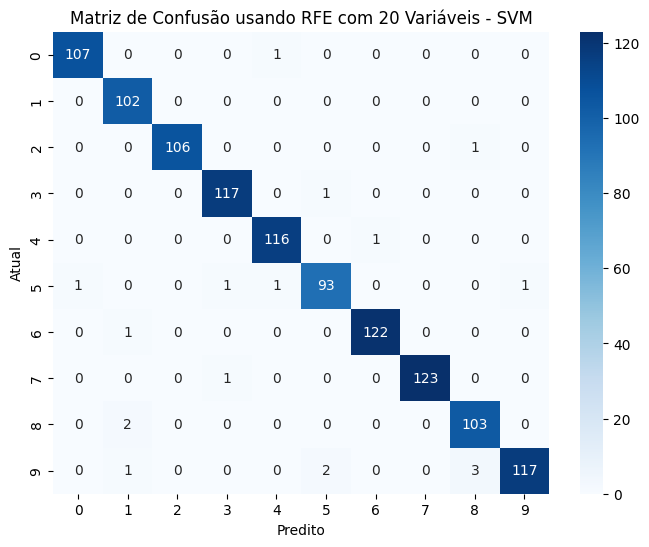

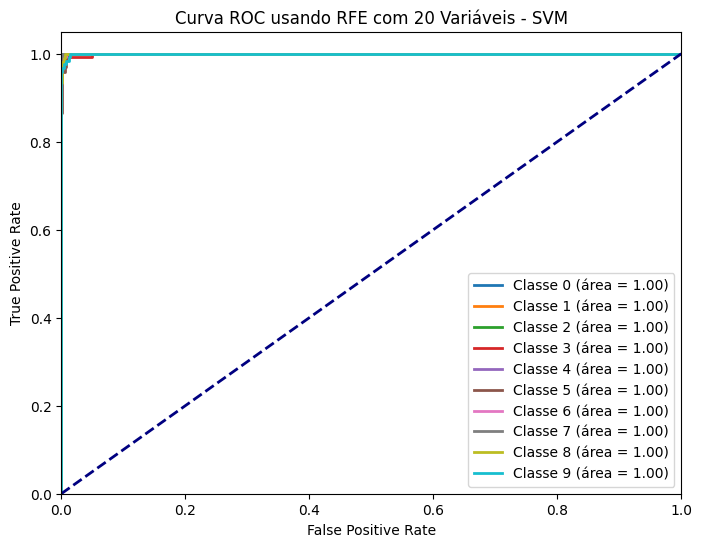

Relatório de Classificação - SVM (RFE com 20 Variáveis):

Acurácia: 0.9840

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.96      1.00      0.98       102
           2       1.00      0.99      1.00       107
           3       0.98      0.99      0.99       118
           4       0.98      0.99      0.99       117
           5       0.97      0.96      0.96        97
           6       0.99      0.99      0.99       123
           7       1.00      0.99      1.00       124
           8       0.96      0.98      0.97       105
           9       0.99      0.95      0.97       123

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124




Resultados para RFE com 25 Variáveis:


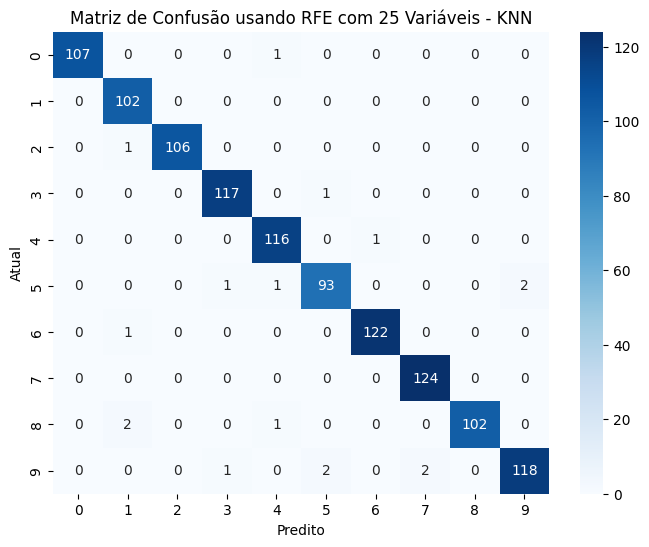

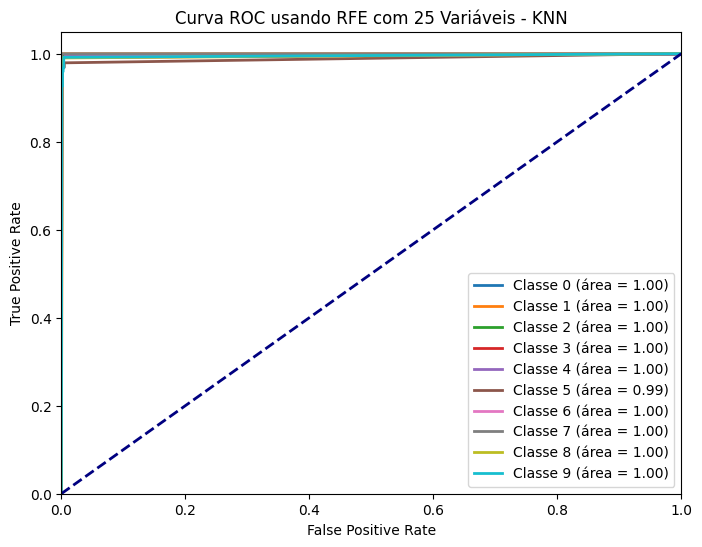

Relatório de Classificação - KNN (RFE com 25 Variáveis):

Acurácia: 0.9849

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.96      1.00      0.98       102
           2       1.00      0.99      1.00       107
           3       0.98      0.99      0.99       118
           4       0.97      0.99      0.98       117
           5       0.97      0.96      0.96        97
           6       0.99      0.99      0.99       123
           7       0.98      1.00      0.99       124
           8       1.00      0.97      0.99       105
           9       0.98      0.96      0.97       123

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.99      0.98      0.98      1124





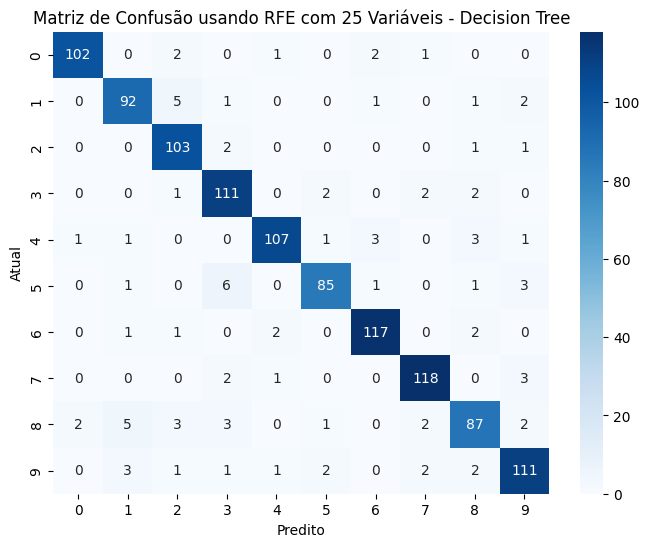

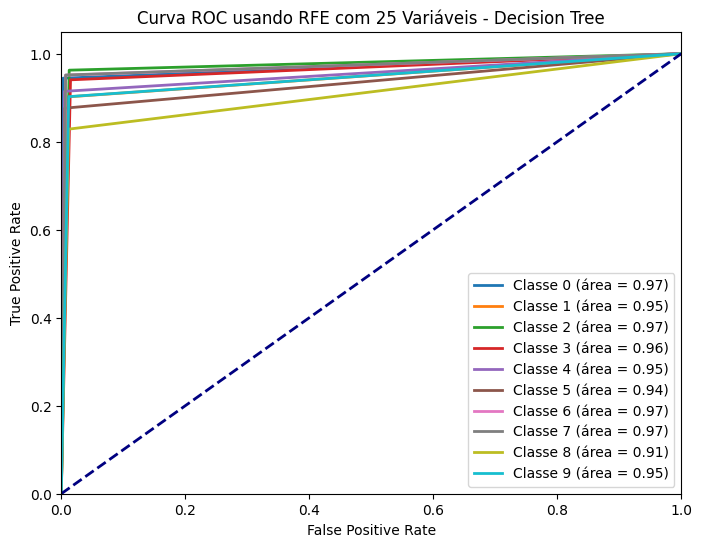

Relatório de Classificação - Decision Tree (RFE com 25 Variáveis):

Acurácia: 0.9190

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.89      0.90      0.90       102
           2       0.89      0.96      0.92       107
           3       0.88      0.94      0.91       118
           4       0.96      0.91      0.93       117
           5       0.93      0.88      0.90        97
           6       0.94      0.95      0.95       123
           7       0.94      0.95      0.95       124
           8       0.88      0.83      0.85       105
           9       0.90      0.90      0.90       123

    accuracy                           0.92      1124
   macro avg       0.92      0.92      0.92      1124
weighted avg       0.92      0.92      0.92      1124





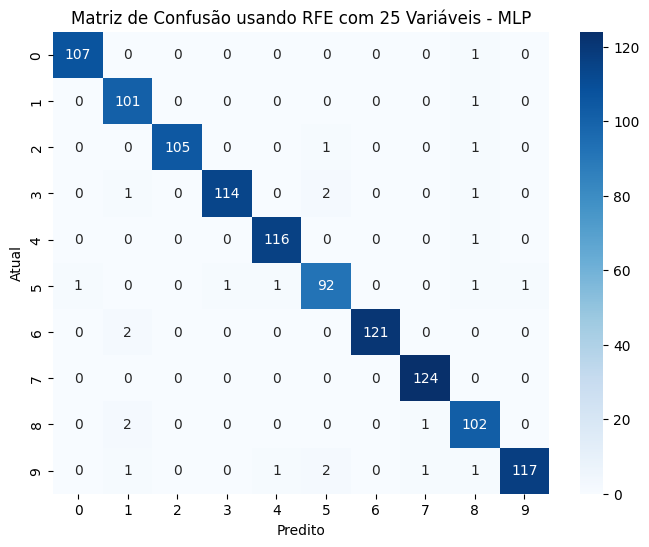

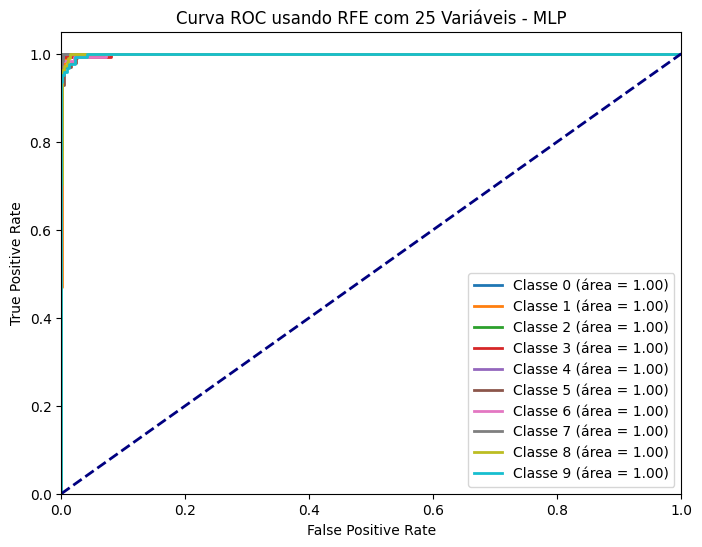

Relatório de Classificação - MLP (RFE com 25 Variáveis):

Acurácia: 0.9778

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.94      0.99      0.97       102
           2       1.00      0.98      0.99       107
           3       0.99      0.97      0.98       118
           4       0.98      0.99      0.99       117
           5       0.95      0.95      0.95        97
           6       1.00      0.98      0.99       123
           7       0.98      1.00      0.99       124
           8       0.94      0.97      0.95       105
           9       0.99      0.95      0.97       123

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124





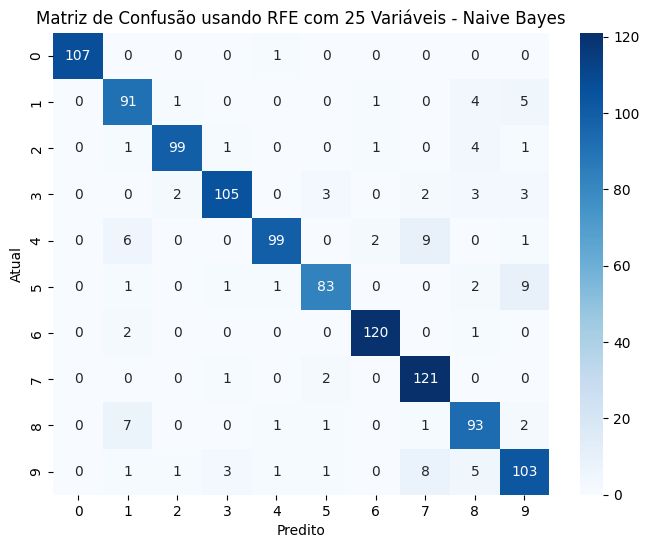

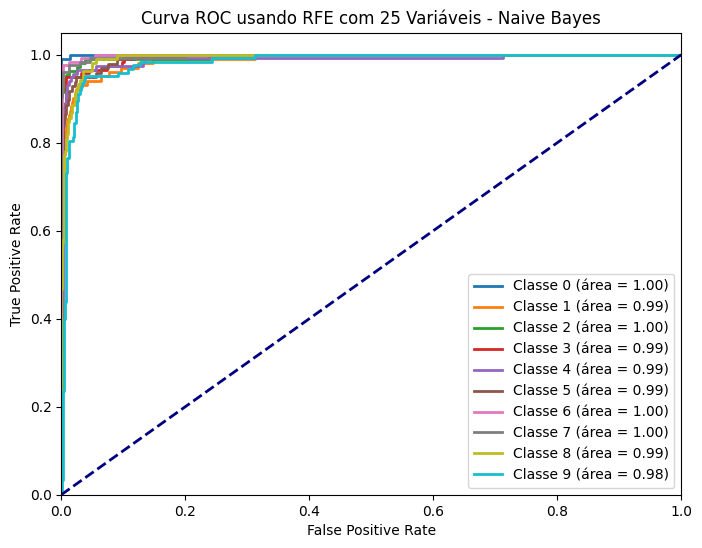

Relatório de Classificação - Naive Bayes (RFE com 25 Variáveis):

Acurácia: 0.9084

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.83      0.89      0.86       102
           2       0.96      0.93      0.94       107
           3       0.95      0.89      0.92       118
           4       0.96      0.85      0.90       117
           5       0.92      0.86      0.89        97
           6       0.97      0.98      0.97       123
           7       0.86      0.98      0.91       124
           8       0.83      0.89      0.86       105
           9       0.83      0.84      0.83       123

    accuracy                           0.91      1124
   macro avg       0.91      0.91      0.91      1124
weighted avg       0.91      0.91      0.91      1124





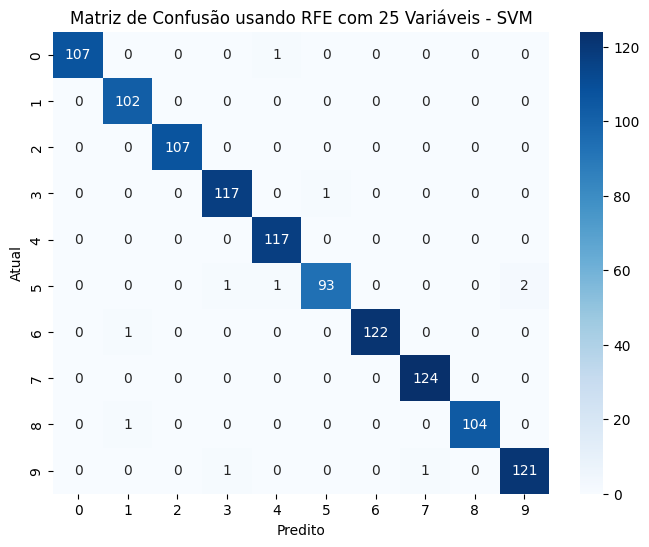

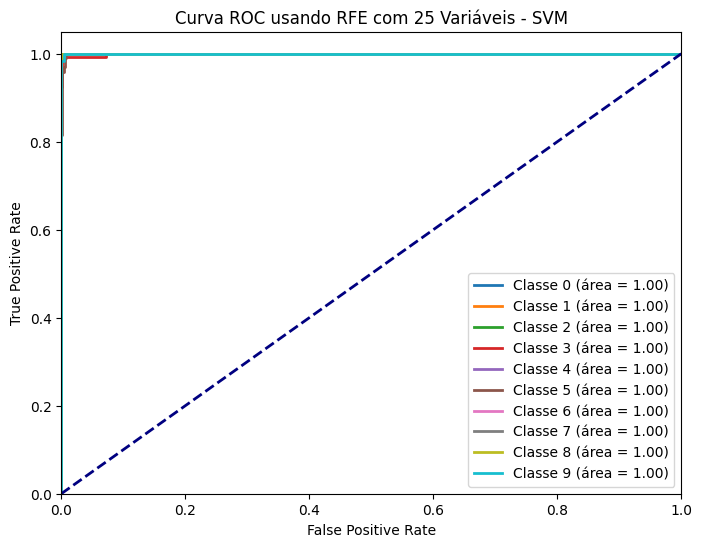

Relatório de Classificação - SVM (RFE com 25 Variáveis):

Acurácia: 0.9911

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.98      1.00      0.99       102
           2       1.00      1.00      1.00       107
           3       0.98      0.99      0.99       118
           4       0.98      1.00      0.99       117
           5       0.99      0.96      0.97        97
           6       1.00      0.99      1.00       123
           7       0.99      1.00      1.00       124
           8       1.00      0.99      1.00       105
           9       0.98      0.98      0.98       123

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124





In [22]:
# Lista de números de variáveis a serem testadas
num_vars_list = [5, 10, 12, 15, 20, 25] #testando

# Função para gerar a matriz de confusão com números anotados
def plot_confusion_matrix(y_true, y_pred, model_name, num_vars):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão usando RFE com {num_vars} Variáveis - {model_name}")
    plt.xlabel("Predito")
    plt.ylabel("Atual")
    plt.show()

# Função para gerar a curva ROC com todas as classes
def plot_roc_curve(y_true, y_prob, n_classes, num_vars, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i} (área = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f"Curva ROC usando RFE com {num_vars} Variáveis - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Transformar as classes em formato binário para ROC multi-classe
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Loop para testar diferentes números de variáveis
for num_vars in num_vars_list:
    print(f"\nResultados para RFE com {num_vars} Variáveis:\n" + "="*60)

    # Aplicando RFE usando uma Decision Tree como estimador
    base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=24, random_state=42)
    selector = RFE(base_estimator, n_features_to_select=num_vars, step=1)
    X_train_rfe = selector.fit_transform(X_train, y_train)
    X_test_rfe = selector.transform(X_test)

    # Treinando cada modelo com os dados reduzidos
    for model_name, model in models.items():
        # Treinando o modelo
        model.fit(X_train_rfe, y_train)

        # Realizando previsões
        y_pred = model.predict(X_test_rfe)
        y_prob = model.predict_proba(X_test_rfe)

        # Calculando e exibindo a acurácia com 4 casas decimais
        accuracy = accuracy_score(y_test, y_pred)

        # Plotando Matriz de Confusão
        plot_confusion_matrix(y_test, y_pred, model_name, num_vars)

        # Plotando Curva ROC
        plot_roc_curve(y_test_bin, y_prob, n_classes=10, num_vars=num_vars, model_name=model_name)

        # Exibindo Relatório de Classificação e Acurácia
        print(f"Relatório de Classificação - {model_name} (RFE com {num_vars} Variáveis):\n")
        print(f"Acurácia: {accuracy:.4f}\n")
        print(classification_report(y_test, y_pred))
        print("\n" + "="*60 + "\n")

Com estes resultados, iremos realizar um comparativo com aqueles encontrados no projeto 1, realizado sem o pré-processamento.